# Walkthrough

In [1]:
import joblib
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import numpy as np

In [2]:
from classes import preprocess, eda, LDA, KMeansClustering, sentiment_analysis, models

c:\users\mdfl0\appdata\local\programs\python\python39\lib\site-packages\past\builtins\misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mdfl0\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Data preparation (compiled data to be manually tagged according to the context)


In [80]:
# read already preprocessed data
free_tuition = preprocess(df='validated data/free tuition comments.csv', added_stopwords='filipino_stopwords.csv', drop=['features','features_string_format'], 
                          sent_column=['CONTEXT-BASED'],comment_column='comment_text', dups=1)

# preprocess raw validated data
bam = preprocess(df='validated data/Bam Aquino Raw Comments.csv',added_stopwords='filipino_stopwords.csv', sent_column=['Comment Validation (Context-based)'],comment_column='Comment', dups=1)

# preprocess
laz = preprocess(df='validated data/Lazada Review.csv',added_stopwords='filipino_stopwords.csv', comment_column='review', dups=1)

Column Headers:  ['Unnamed: 0', 'comment_text', 'CONTEXT-BASED', 'url', 'features', 'features_string_format', 'content_creator']
shape of raw dataframe:  (1793, 7)
Sentiment null count:  CONTEXT-BASED    0
dtype: int64
CONTEXT-BASED
neutral          918
positive         529
negative         336
nuetral            7
neiutral           1
neutrl             1
nursing            1
dtype: int64
shape of mapped dataframe:  (1793, 7)
Sentiment null count:  CONTEXT-BASED    10
dtype: int64
shape of dataframe when null comments were dropped:  (1793, 7)
shape of dataframe when preprocessed and duplicated values where dropped:  (1525, 7)
shape of final dataframe when rows that have null values where dropped:  (1524, 7)
Column Headers:  ['Comment', 'Comment type (Text-based)', 'Comment Image Rate', 'Account', 'Comment Validation (Context-based)', 'Notes', 'Video Link', 'Unnamed: 7']
shape of raw dataframe:  (5496, 8)
Sentiment null count:  Comment Validation (Context-based)    0
dtype: int64
Comme

In [81]:
free_tuition.df['content_creator'].value_counts()

jqcrypto       698
mksocialhub    463
papabi         185
janelletee     178
Name: content_creator, dtype: int64

# Exploratory Data analysis of modelling data

## bam data

In [18]:
bam.df.head()

Comment  \
0  SANDALI PAGOUT KO MAGREACT AKO SA "READY FOR L...   
1  "Madaling hulaan presidente binoto mo. Pramis!...   
2  kuya reaction video Naman sa ready for love ng bp   
3               REACTION TO BLACKPINI READY FOR LOVE   
4     beb beyonce fan ka ba? renaissance is outtt!!!   

  Comment type (Text-based)  Comment Image Rate       Account  \
0                   neutral                   1  _renceseason   
1                   neutral                   1  _renceseason   
2                   neutral                   1  _renceseason   
3                   neutral                   1  _renceseason   
4                   neutral                   1  _renceseason   

   Comment Validation (Context-based)               Notes  \
0                                   1  not related to Bam   
1                                   1  not related to Bam   
2                                   1  not related to Bam   
3                                   1  not related to Bam   
4                                   1  not related to Bam   

                                          Video Link Unnamed: 7  \
0  https://www.tiktok.com/@_renceseason/video/712...        NaN   
1  https://www.tiktok.com/@_renceseason/video/712...        NaN   
2  https://www.tiktok.com/@_renceseason/video/712...        NaN   
3  https://www.tiktok.com/@_renceseason/video/712...        NaN   
4  https://www.tiktok.com/@_renceseason/video/712...        NaN   

                                            features  \
0           [sandali, pagout, magreact, ready, love]   
1  [madaling, hulaan, presidente, binoto, pramis,...   
2               [kuya, reaction, video, ready, love]   
3                 [reaction, blackpini, ready, love]   
4              [beb, beyonce, fan, renaissance, !!!]   

                              features_string_format  
0                 sandali pagout magreact ready love  
1  madaling hulaan presidente binoto pramis hahah...  
2                     kuya reaction video ready love  
3                      reaction blackpini ready love  
4                    beb beyonce fan renaissance !!!

In [19]:
eda_bam = eda(bam.df, text_column_name='features_string_format', sent_column_name='Comment Validation (Context-based)',folder='bam')

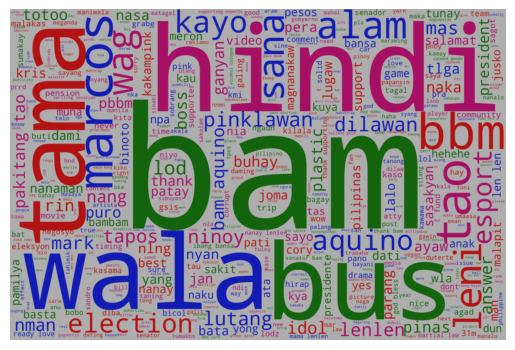

In [20]:
# data's whole wordcloud
eda_bam.generate_wordcloud(filename='bam_all_comment_free_tuition')

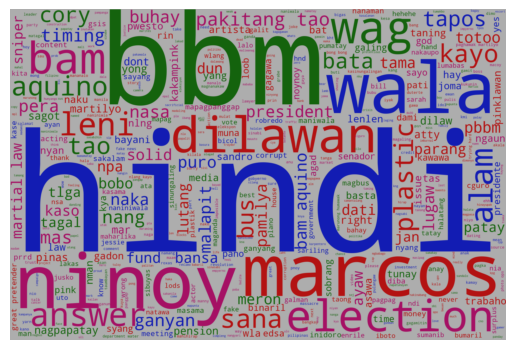

In [21]:
# negative word cloud
eda_bam.generate_wordcloud('bam_negative_free_tution', 'Comment Validation (Context-based)', 0.0)

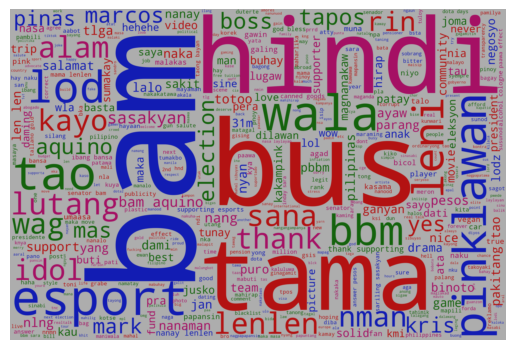

In [22]:
# positive wordcloud
eda_bam.generate_wordcloud('bam_negative_free_tution', 'Comment Validation (Context-based)', 2.0)

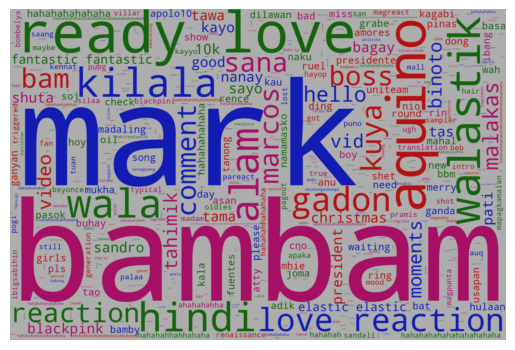

In [23]:
# neutral wordcloud
eda_bam.generate_wordcloud('bam_negative_free_tution', 'Comment Validation (Context-based)', 1.0)

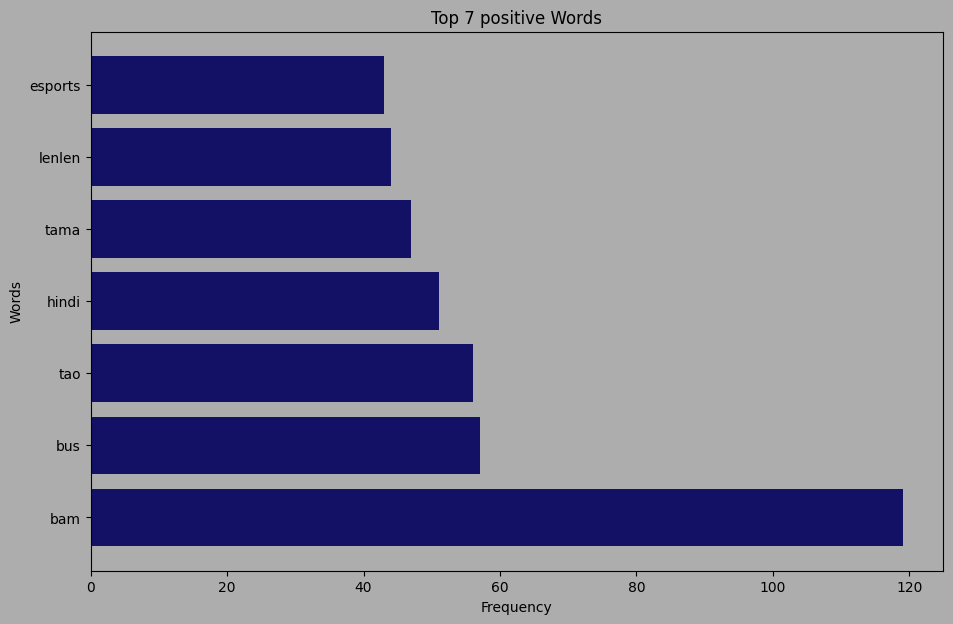

In [25]:
# top 5 positive comments
x = bam.df[bam.df['Comment Validation (Context-based)'] == 2]
positive = eda(x, text_column_name='features_string_format', sent_column_name='Comment Validation (Context-based)')
positive.top_words(7, 'positive', 'bam_positive_free_tution')

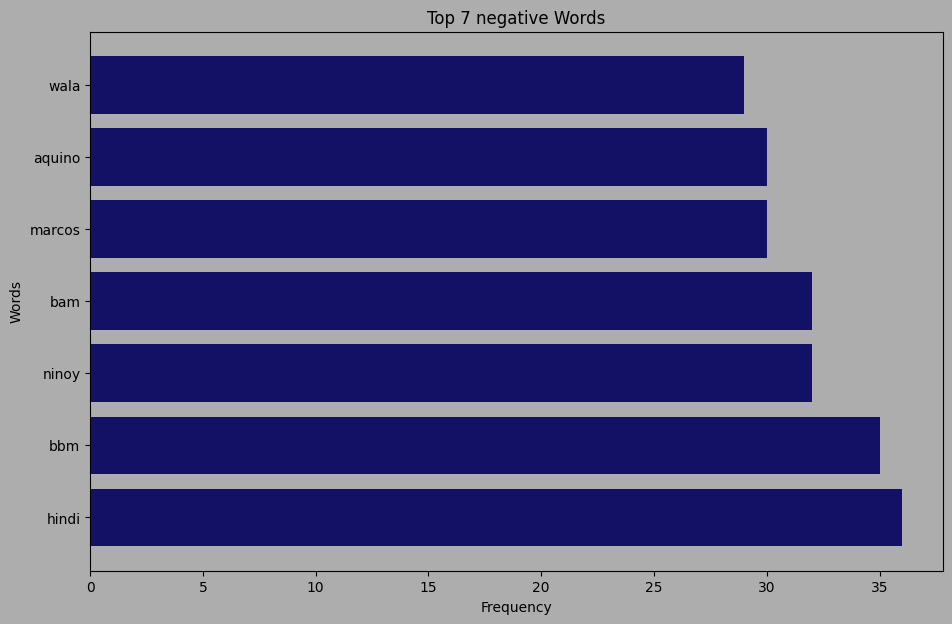

In [26]:
# top 5 negative comments
x = bam.df[bam.df['Comment Validation (Context-based)'] == 0.0]
negative = eda(x, text_column_name='features_string_format', sent_column_name='Comment Validation (Context-based)')
negative.top_words(7, 'negative', 'bam_negative_free_tution')

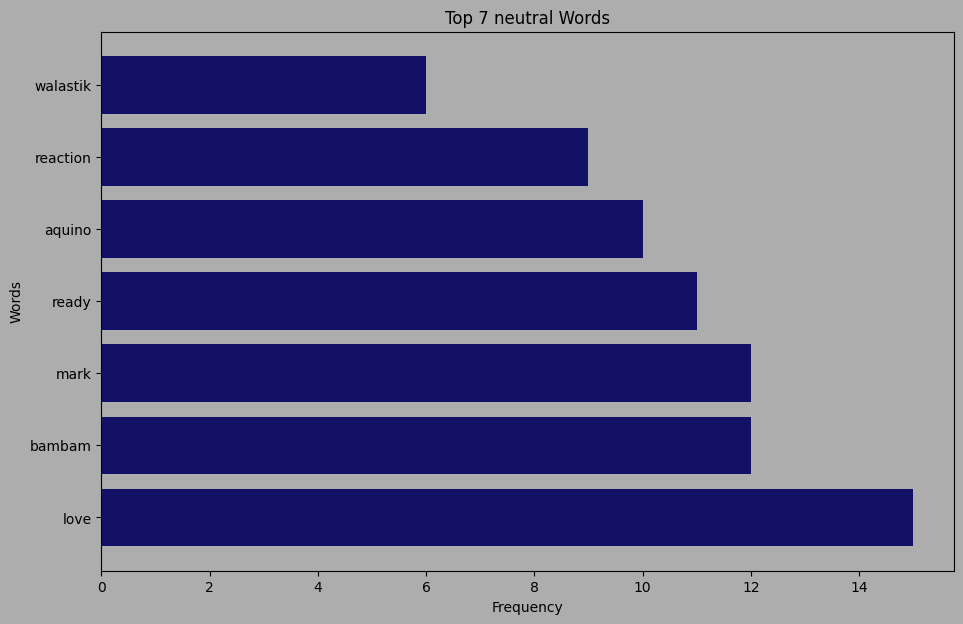

In [27]:
# top 5 neutral comments
x = bam.df[bam.df['Comment Validation (Context-based)'] == 1.0]
neutral = eda(x, text_column_name='features_string_format', sent_column_name='Comment Validation (Context-based)')
neutral.top_words(7, 'neutral', 'bam_neutral_free_tution')

## free tuition data

In [31]:
eda_free = eda(free_tuition.df, text_column_name='features_string_format', sent_column_name='CONTEXT-BASED',folder='free tuition')

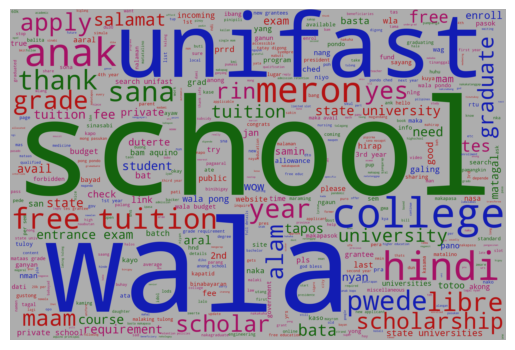

In [33]:
# data's whole wordcloud
eda_free.generate_wordcloud(filename='free_all_comment_free_tuition')

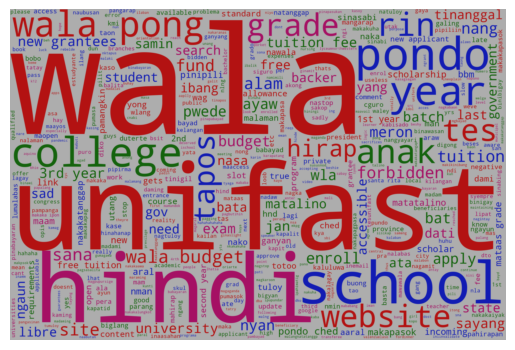

In [34]:
# negative word cloud
eda_free.generate_wordcloud('free_negative_free_tution', 'CONTEXT-BASED', 0.0)

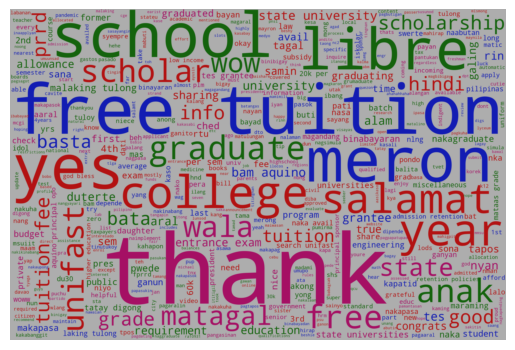

In [35]:
# positive wordcloud
eda_free.generate_wordcloud('free_negative_free_tution', 'CONTEXT-BASED', 2.0)

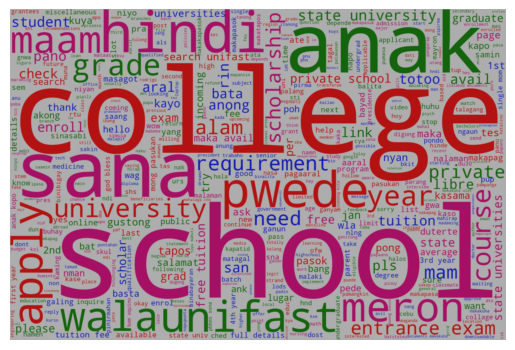

In [36]:
# neutral wordcloud
eda_free.generate_wordcloud('free_neutral_free_tution', 'CONTEXT-BASED', 1.0)

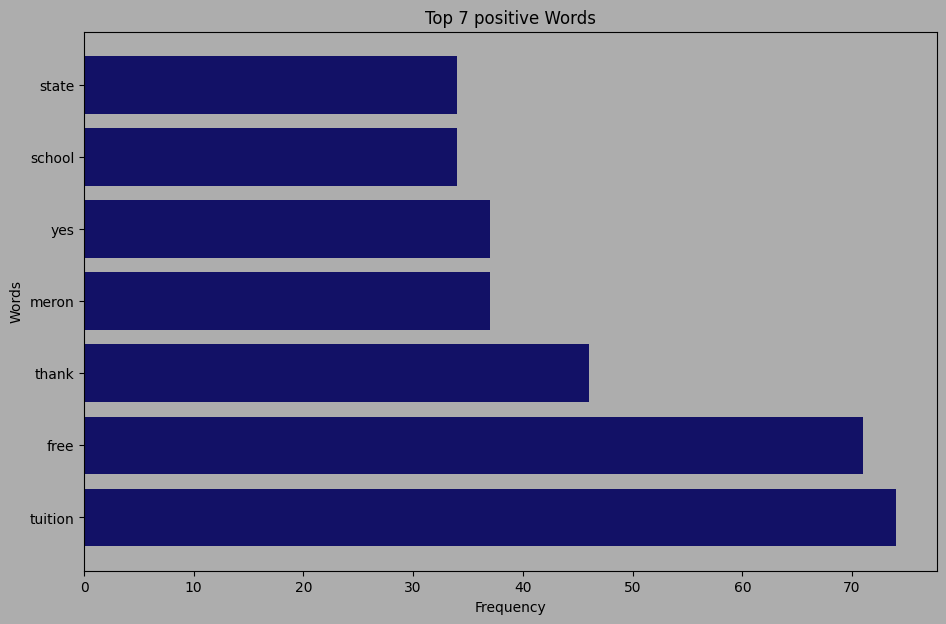

In [37]:
# top 7 positive comments
x = free_tuition.df[free_tuition.df['CONTEXT-BASED'] == 2]
positive = eda(x, text_column_name='features_string_format', sent_column_name='CONTEXT-BASED')
positive.top_words(7, 'positive', 'free_positive_free_tution')

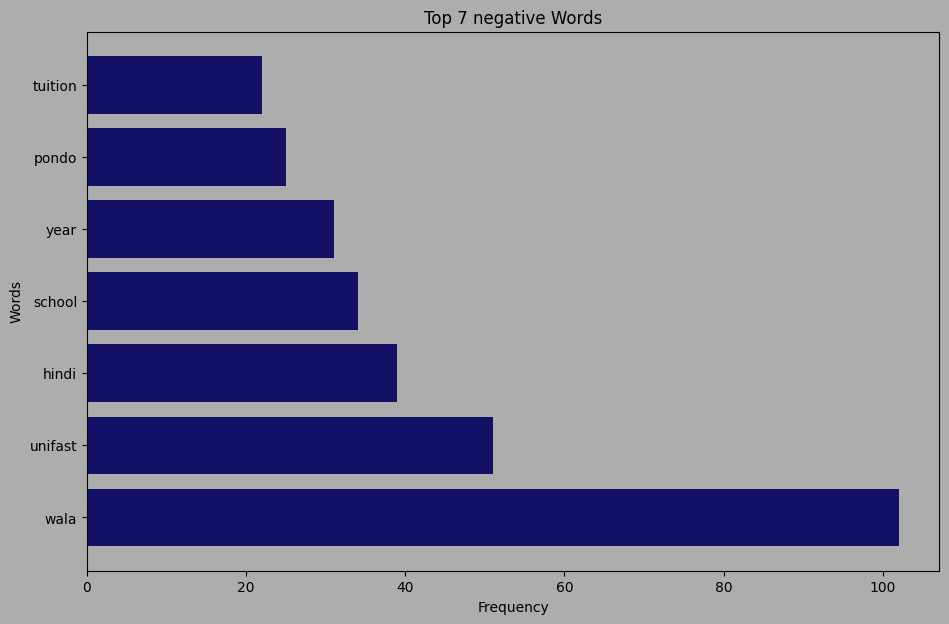

In [38]:
# top 7 negative comments
x = free_tuition.df[free_tuition.df['CONTEXT-BASED'] == 0.0]
negative = eda(x, text_column_name='features_string_format', sent_column_name='CONTEXT-BASED')
negative.top_words(7, 'negative', 'free_negative_free_tution')

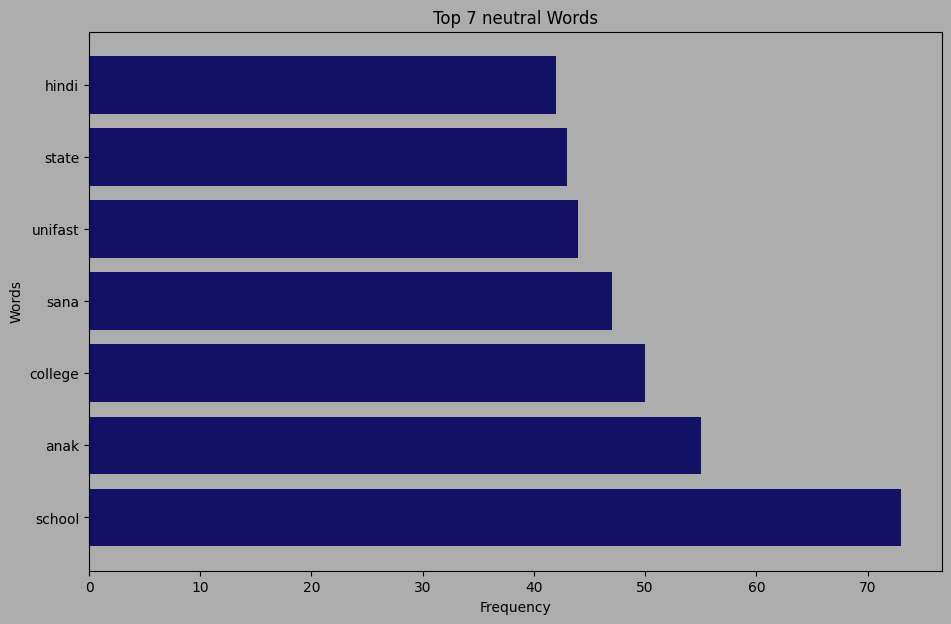

In [39]:
# top 7 neutral comments
x = free_tuition.df[free_tuition.df['CONTEXT-BASED'] == 1.0]
neutral = eda(x, text_column_name='features_string_format', sent_column_name='CONTEXT-BASED')
neutral.top_words(7, 'neutral', 'free_neutral_free_tution')

## lazada data

In [41]:
eda_laz = eda(laz.df, text_column_name='features_string_format', sent_column_name='rating',folder='lazada')

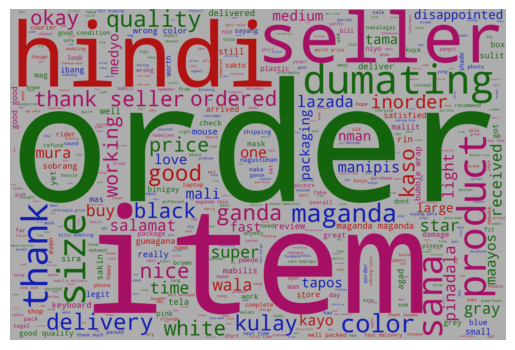

In [46]:
# data's whole wordcloud
eda_laz.generate_wordcloud(filename='laz_all_comment_free_tuition')

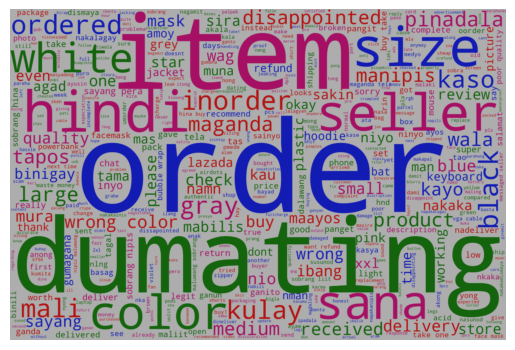

In [47]:
# negative word cloud
eda_laz.generate_wordcloud('laz_negative_free_tution', 'rating', 0.0)

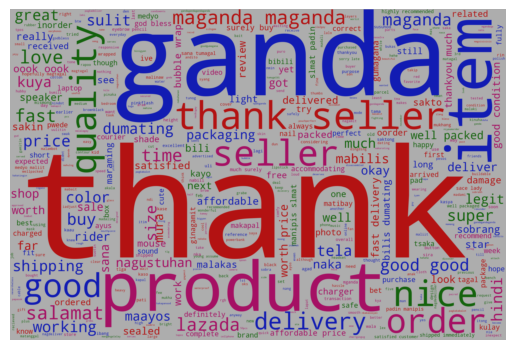

In [48]:
# positive wordcloud
eda_laz.generate_wordcloud('laz_negative_free_tution', 'rating', 2.0)

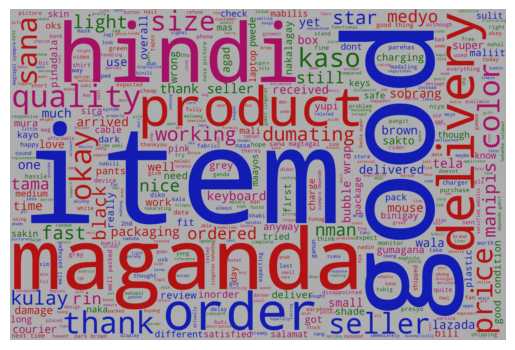

In [49]:
# neutral wordcloud
eda_laz.generate_wordcloud('laz_neutral_free_tution', 'rating', 1.0)

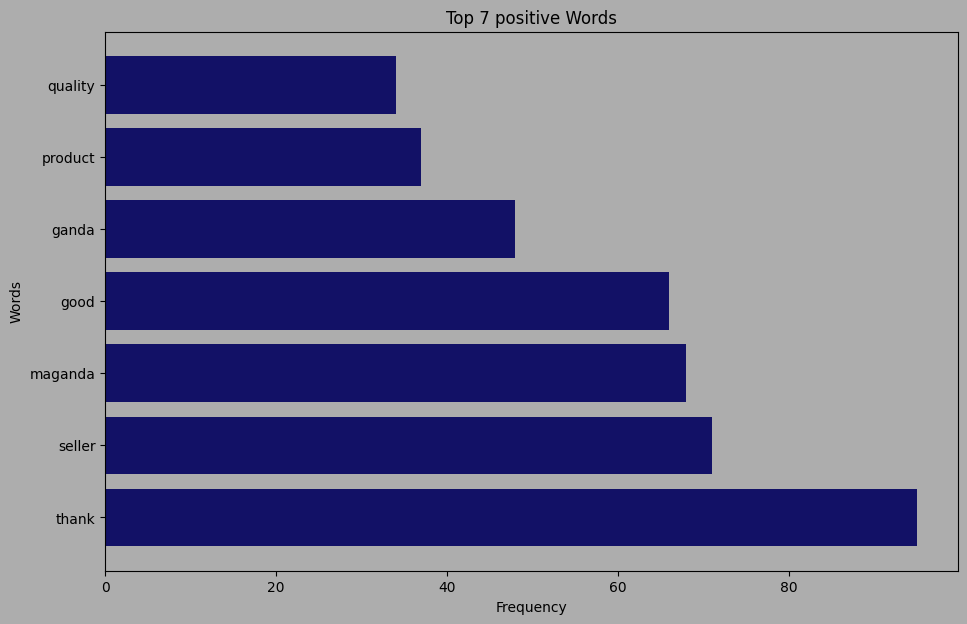

In [50]:
# top 7 positive comments
x = laz.df[laz.df['rating'] == 2]
positive = eda(x, text_column_name='features_string_format', sent_column_name='rating')
positive.top_words(7, 'positive', 'laz_positive_free_tution')

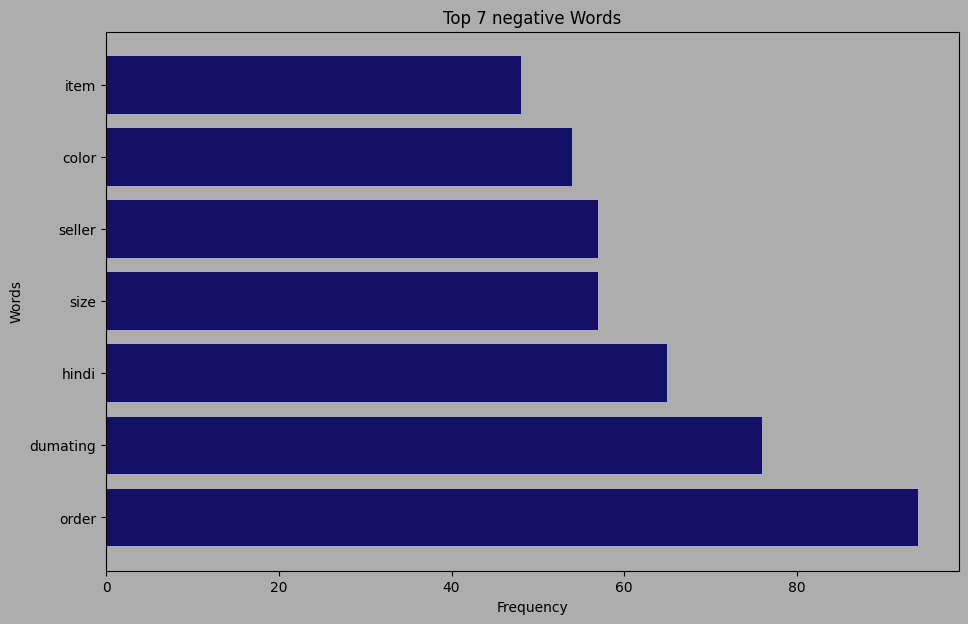

In [51]:
# top 7 negative comments
x = laz.df[laz.df['rating'] == 0.0]
negative = eda(x, text_column_name='features_string_format', sent_column_name='rating')
negative.top_words(7, 'negative', 'laz_negative_free_tution')

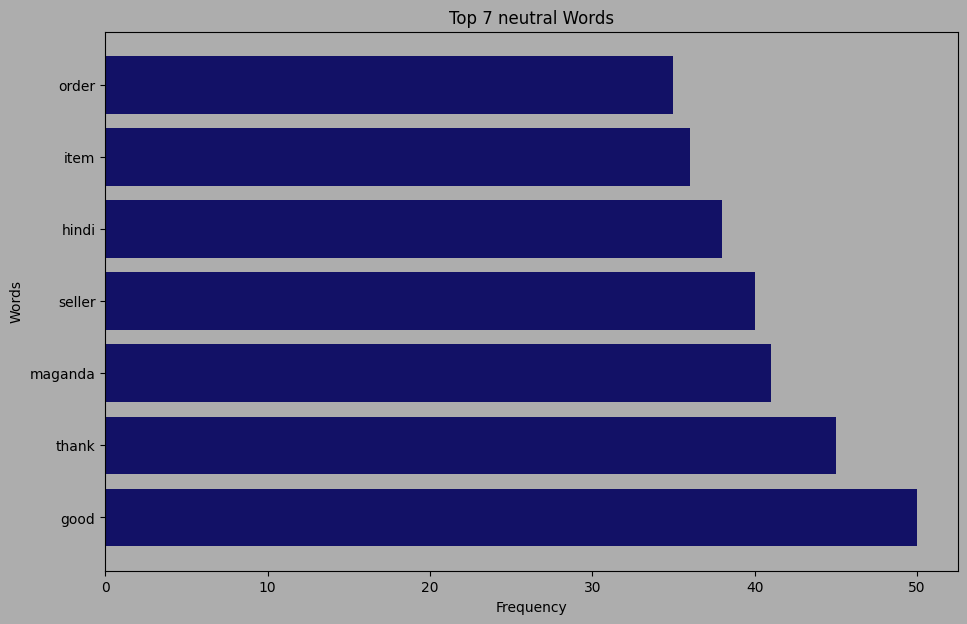

In [52]:
# top 7 neutral comments
x = laz.df[laz.df['rating'] == 1.0]
neutral = eda(x, text_column_name='features_string_format', sent_column_name='rating')
neutral.top_words(7, 'neutral', 'laz_neutral_free_tution')

# Modelling (SVM)

In [82]:
dataset = pd.read_csv('balanced_data_context4.6k.csv')

In [83]:
# create a model for related to bam and context based
x = models(df=dataset, x='Comment', y='category', filename='context_base_model')

In [84]:
x.svm()

svm or dectree
Accuracy: 0.7056277056277056
F1 score (micro): 0.7056277056277056
F1 score (macro): 0.7070362228056362
Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.71      0.67       308
           1       0.82      0.76      0.79       308
           2       0.67      0.65      0.66       308

    accuracy                           0.71       924
   macro avg       0.71      0.71      0.71       924
weighted avg       0.71      0.71      0.71       924



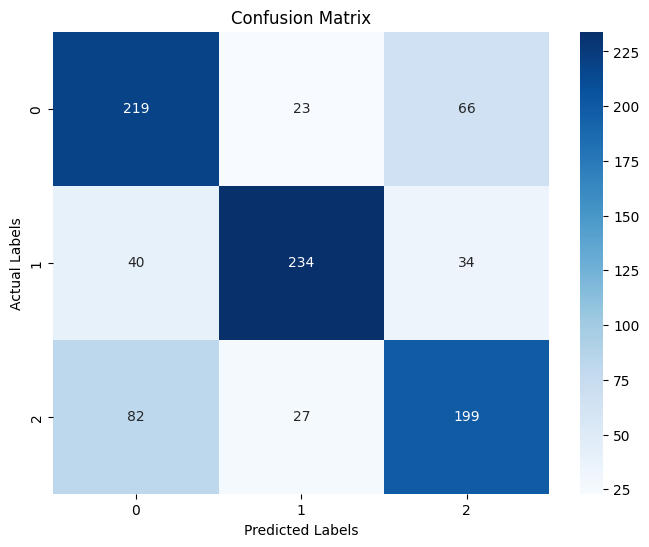

In [85]:
x.evaluate_model()

In [83]:
# Modelling (decision tree)

In [84]:
y = models(df=dataset, x='Comment', y='category', filename='context_base_model')

In [85]:
y.decision_tree()

svm or dectree
Accuracy: 0.6071428571428571
F1 score (micro): 0.6071428571428571
F1 score (macro): 0.6029616077520628
Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.69      0.59       308
           1       0.74      0.71      0.72       308
           2       0.58      0.42      0.49       308

    accuracy                           0.61       924
   macro avg       0.61      0.61      0.60       924
weighted avg       0.61      0.61      0.60       924



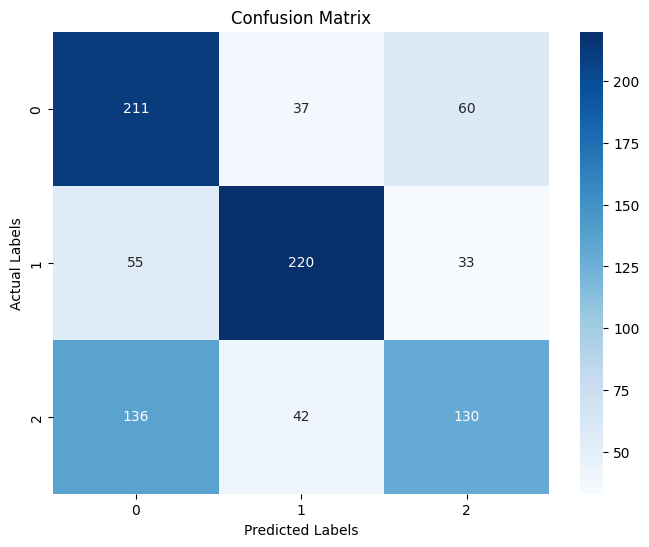

In [86]:
y.evaluate_model()

# Non Duplicate values (context base)

## Phase 1: Free tuition sentiments of jqcrypto's video

### A. Facts and analysis

In [87]:
free_tuition.df.head()

Unnamed: 0                                       comment_text  \
0           0                                           pano po?   
1           1  Pwede ka mag inquire sa mga state universities...   
2           2           bakit ND nman maopen ung link Ng unifast   
3           3  di ko din alam baka maintenance. search unifas...   
4           4  UniFAST grantees hereee for almost 4 years on ...   

   CONTEXT-BASED                               url content_creator  \
0            1.0  https://vt.tiktok.com/ZSLxJ5jPu/          papabi   
1            1.0  https://vt.tiktok.com/ZSLxJ5jPu/          papabi   
2            1.0  https://vt.tiktok.com/ZSLxJ5jPu/          papabi   
3            1.0  https://vt.tiktok.com/ZSLxJ5jPu/          papabi   
4            2.0  https://vt.tiktok.com/ZSLxJ5jPu/          papabi   

                                            features  \
0                                             [pano]   
1  [pwede, inquire, state, universities, itanong,...   
2                      [nman, maopen, link, unifast]   
3  [alam, maintenance, search, unifast, 20232024,...   
4  [unifast, grantees, almost, years, private, sc...   

                              features_string_format  
0                                               pano  
1  pwede inquire state universities itanong meron...  
2                           nman maopen link unifast  
3      alam maintenance search unifast 20232024 muna  
4       unifast grantees almost years private school

In [88]:
df1 = free_tuition.df[free_tuition.df['content_creator'] == 'jqcrypto']

In [89]:
df1['CONTEXT-BASED'].value_counts() 

2.0    280
1.0    275
0.0    141
Name: CONTEXT-BASED, dtype: int64

In [90]:
eda_jqcrypto = eda(df1, text_column_name='features_string_format', sent_column_name='CONTEXT-BASED',folder='jqcrypto')

In [91]:
# total number of comments
eda_jqcrypto.df['features_string_format'].notnull().sum().sum()

701

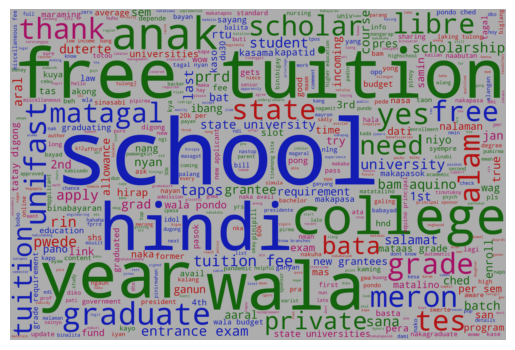

In [92]:
eda_jqcrypto.generate_wordcloud(filename='jqcrypto_all_comment_free_tuition')

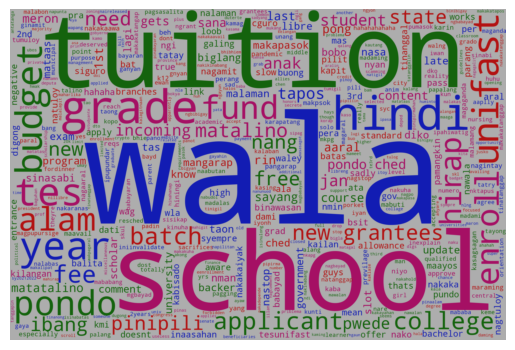

In [93]:
eda_jqcrypto.generate_wordcloud('jqcrypto_negative_free_tution', 'CONTEXT-BASED', 0.0)

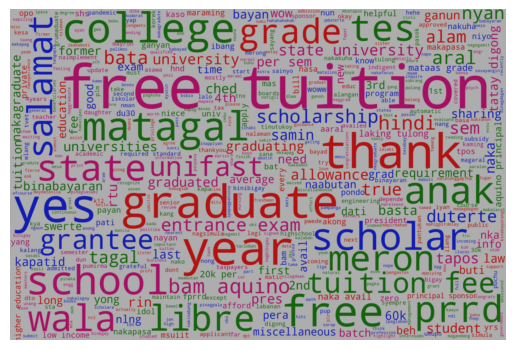

In [94]:
eda_jqcrypto.generate_wordcloud('jqcrypto_positive_free_tution', 'CONTEXT-BASED', 2.0)

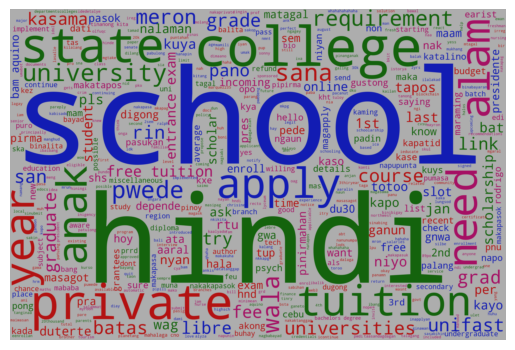

In [95]:
eda_jqcrypto.generate_wordcloud('jqcrypto_neutral_free_tution', 'CONTEXT-BASED', 1.0)

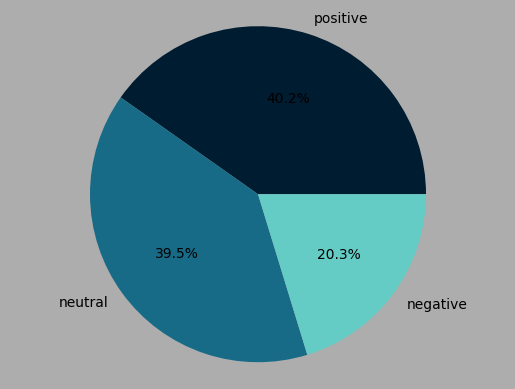

In [96]:
eda_jqcrypto.pie_sentiment('jqcrypto_free_tution', 'CONTEXT-BASED')

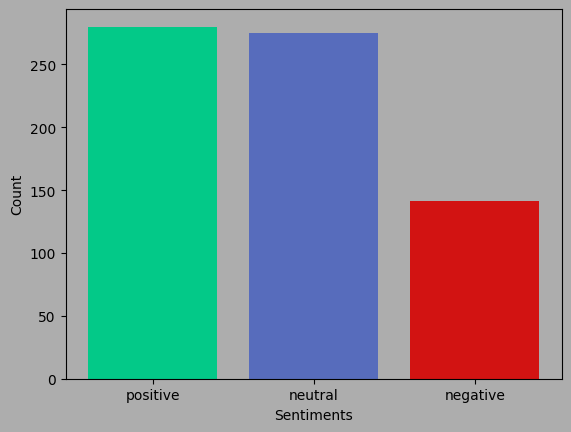

In [97]:
eda_jqcrypto.bar_sentiment('jqcrypto_free_tution', 'CONTEXT-BASED')

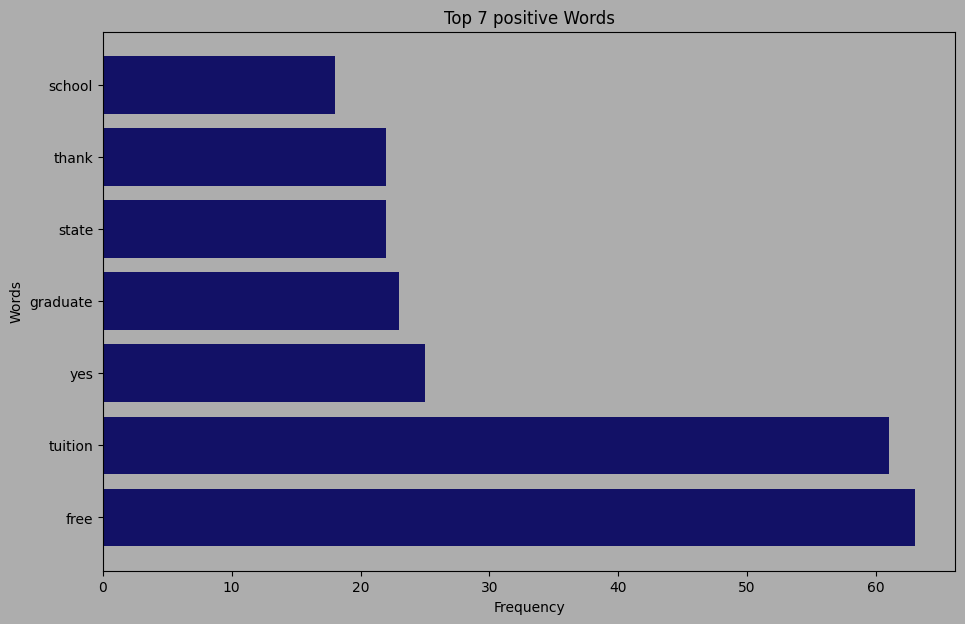

In [100]:
# top 7 positive comments
x = df1[df1['CONTEXT-BASED'] == 2]
positive = eda(x, text_column_name='features_string_format', sent_column_name='CONTEXT-BASED')
positive.top_words(7, 'positive', 'jqcrypto_positive_free_tution')

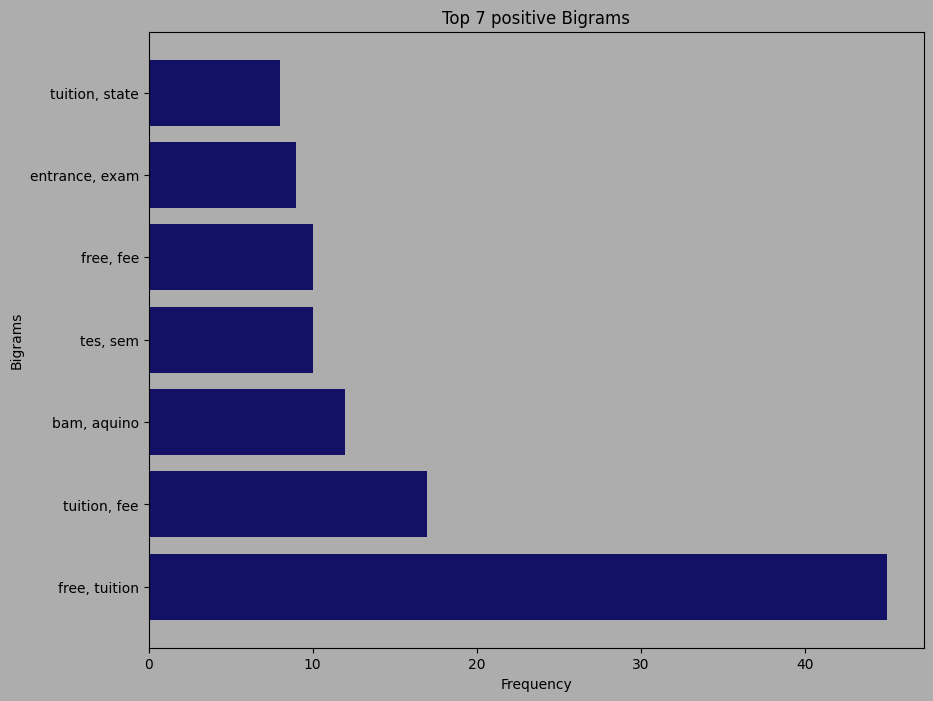

In [101]:
# top 7 positive bigrams
positive.bigrams(7, 'positive', 'jqcrypto_positive_free_tution')

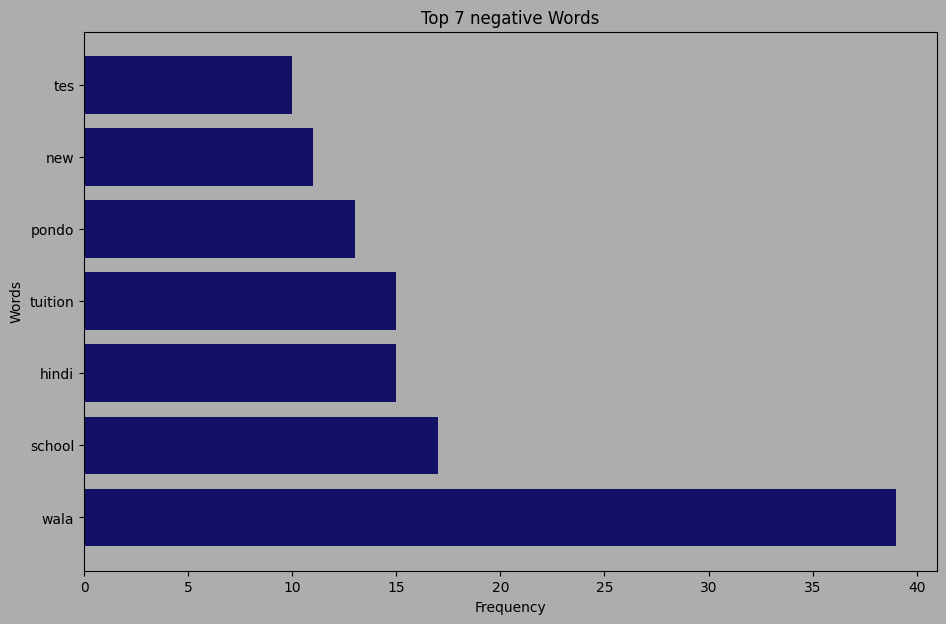

In [102]:
# top 7 negative comments
x = df1[df1['CONTEXT-BASED'] == 0.0]
negative = eda(x, text_column_name='features_string_format', sent_column_name='CONTEXT-BASED')
negative.top_words(7, 'negative', 'jqcrypto_negative_free_tution')

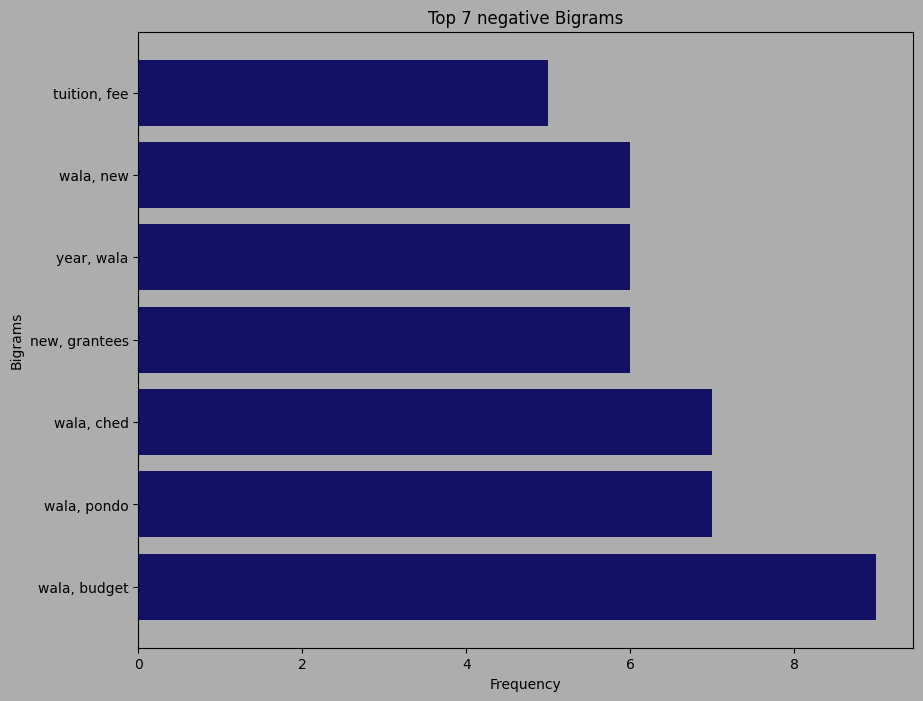

In [103]:
# top 7 negative bigrams 
negative.bigrams(7, 'negative', 'jqcrypto_negative_free_tution')

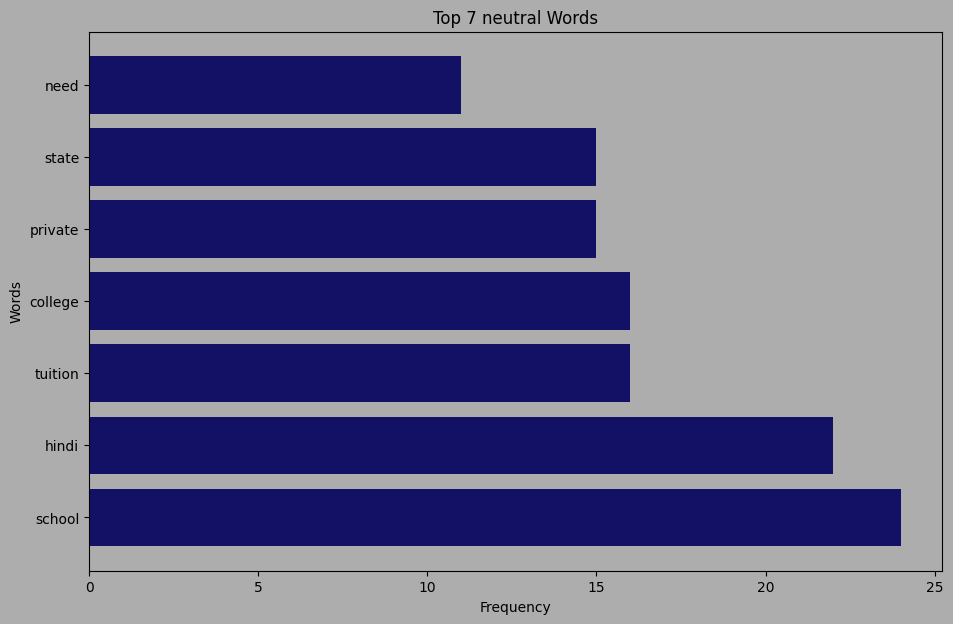

In [104]:
# top 7 neutral comments
x = df1[df1['CONTEXT-BASED'] == 1.0]
neutral = eda(x, text_column_name='features_string_format', sent_column_name='CONTEXT-BASED')
neutral.top_words(7, 'neutral', 'jqcrypto_neutral_free_tution')

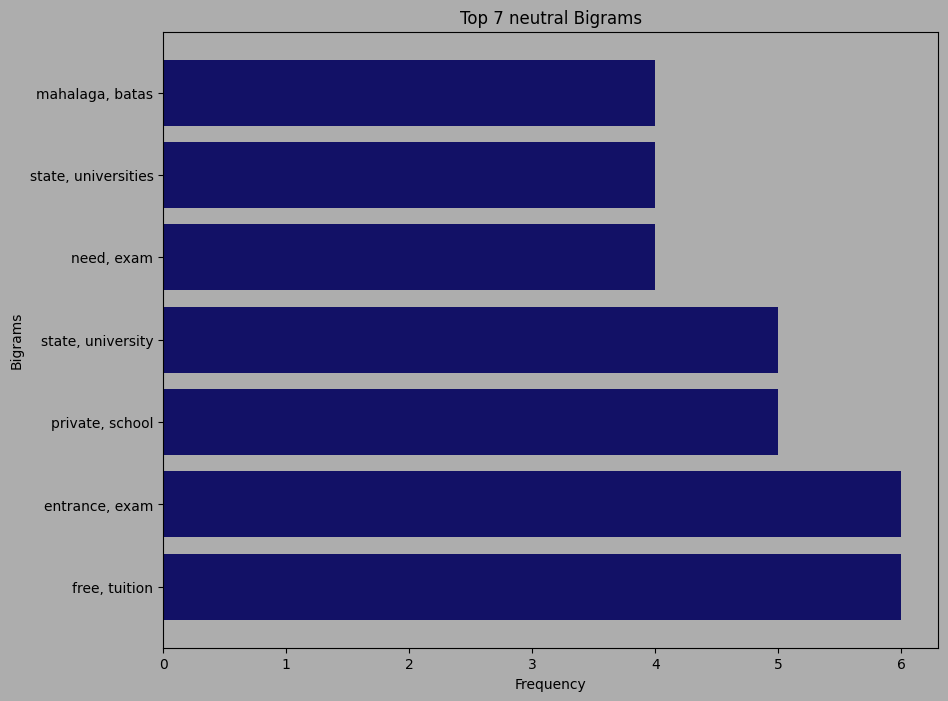

In [105]:
# top 7 negative comments _context_base_bam_related
neutral.bigrams(7, 'neutral', 'jqcrypto_neutral_free_tution')

## Phase 2: Free tuition sentiments of mksocialhub's video

### A. Facts and analysis

In [6]:
df2 = free_tuition.df[free_tuition.df['content_creator'] == 'mksocialhub']

In [7]:
df2['CONTEXT-BASED'].value_counts() 

1.0    253
0.0    128
2.0     82
Name: CONTEXT-BASED, dtype: int64

In [31]:
eda_mksocialhub = eda(df2, text_column_name='features_string_format', sent_column_name='CONTEXT-BASED', folder='mksocialhub')

In [32]:
eda_mksocialhub.df['features_string_format'].notnull().sum().sum()

463

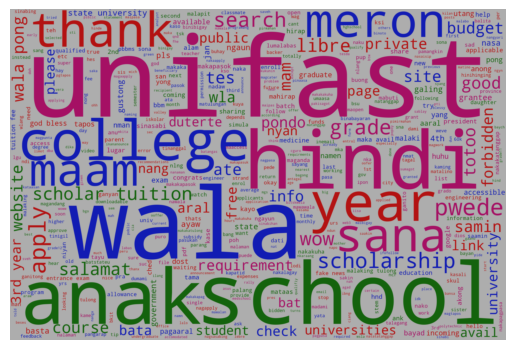

In [33]:
eda_mksocialhub.generate_wordcloud(filename='mksocialhub_all_comment_free_tuition')

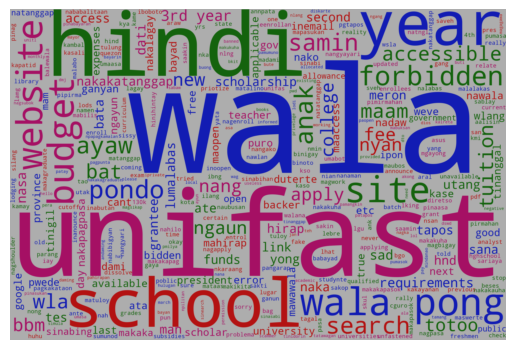

In [34]:
eda_mksocialhub.generate_wordcloud('mksocialhub_negative_free_tution', 'CONTEXT-BASED', 0.0)

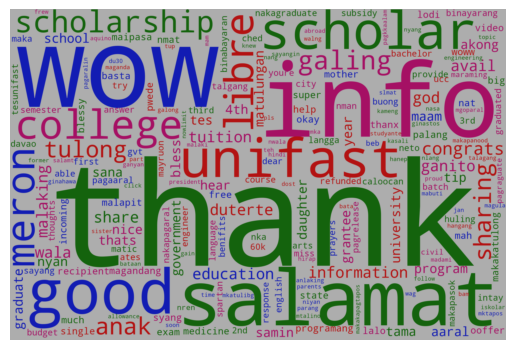

In [35]:
eda_mksocialhub.generate_wordcloud('mksocialhub_positive_free_tution', 'CONTEXT-BASED', 2.0)

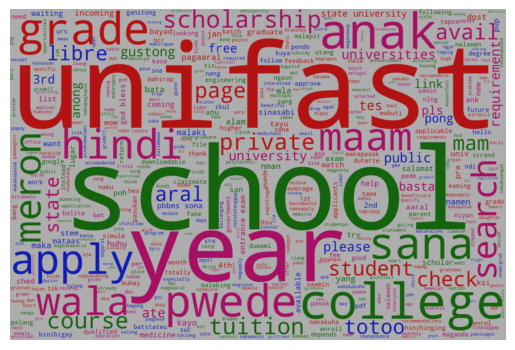

In [36]:
eda_mksocialhub.generate_wordcloud('mksocialhub_neutral_free_tution', 'CONTEXT-BASED', 1.0)

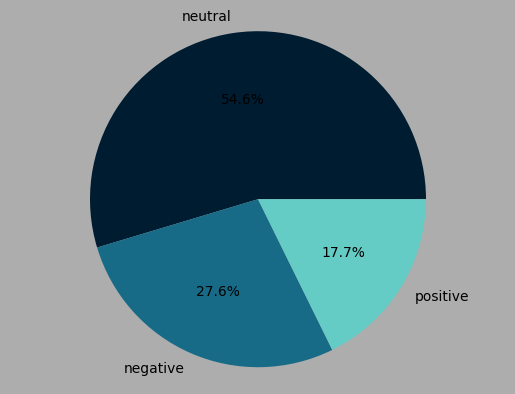

In [37]:
eda_mksocialhub.pie_sentiment('mksocialhub_free_tution', 'CONTEXT-BASED')

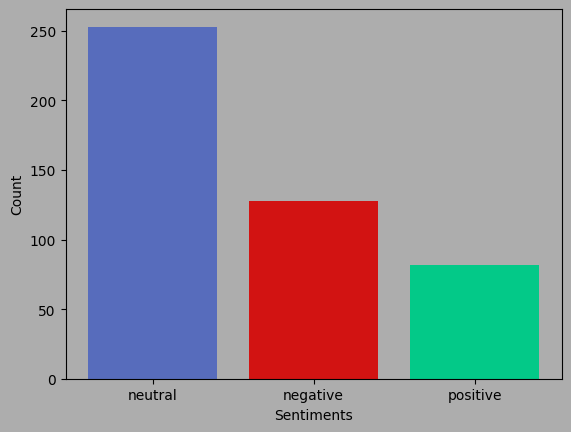

In [38]:
eda_mksocialhub.bar_sentiment('mksocialhub_free_tution', 'CONTEXT-BASED')

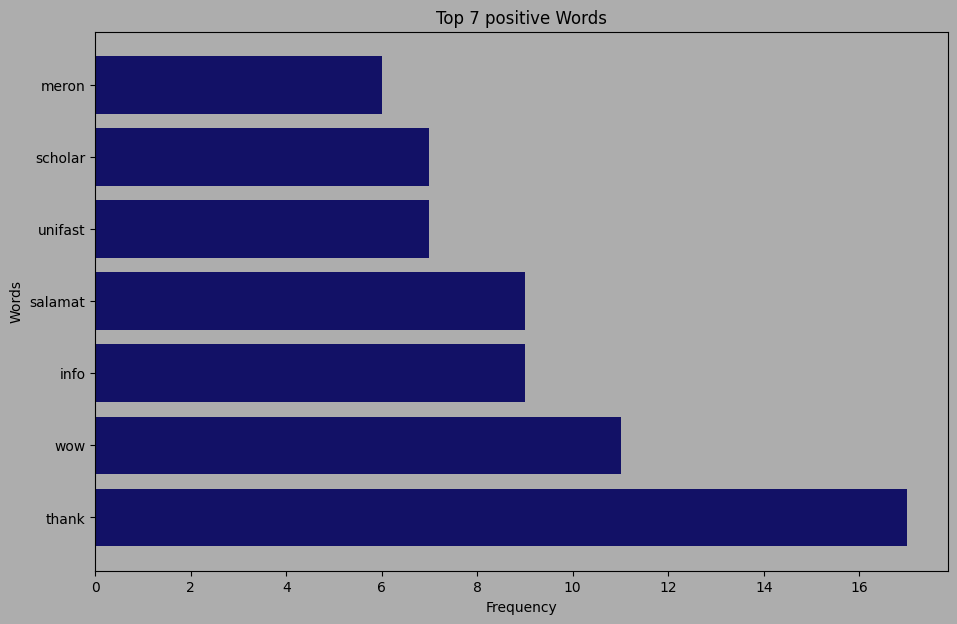

In [39]:
# top 7 positive comments
x = df2[df2['CONTEXT-BASED'] == 2]
positive = eda(x, text_column_name='features_string_format', sent_column_name='CONTEXT-BASED')
positive.top_words(7, 'positive', 'mksocialhub_positive_context_base_free_tution')

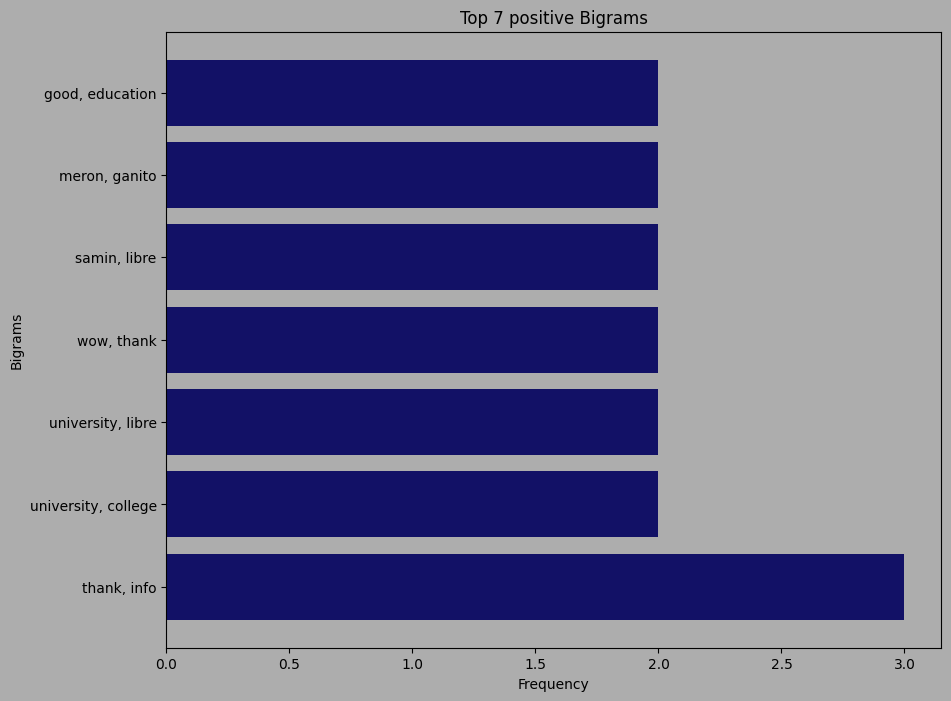

In [23]:
# top 7 positive bigrams
positive.bigrams(7, 'positive', 'mksocialhub_positive_context_base_free_tution')

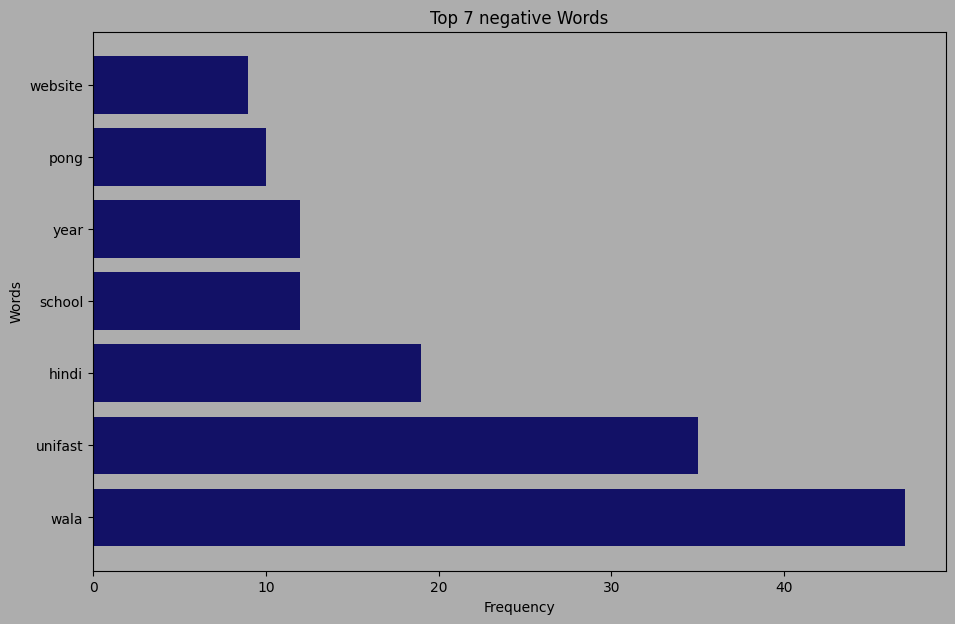

In [24]:
# top 7 negative comments
x = df2[df2['CONTEXT-BASED'] == 0.0]
negative = eda(x, text_column_name='features_string_format', sent_column_name='CONTEXT-BASED')
negative.top_words(7, 'negative', 'mksocialhub_negative_context_base_free_tution')

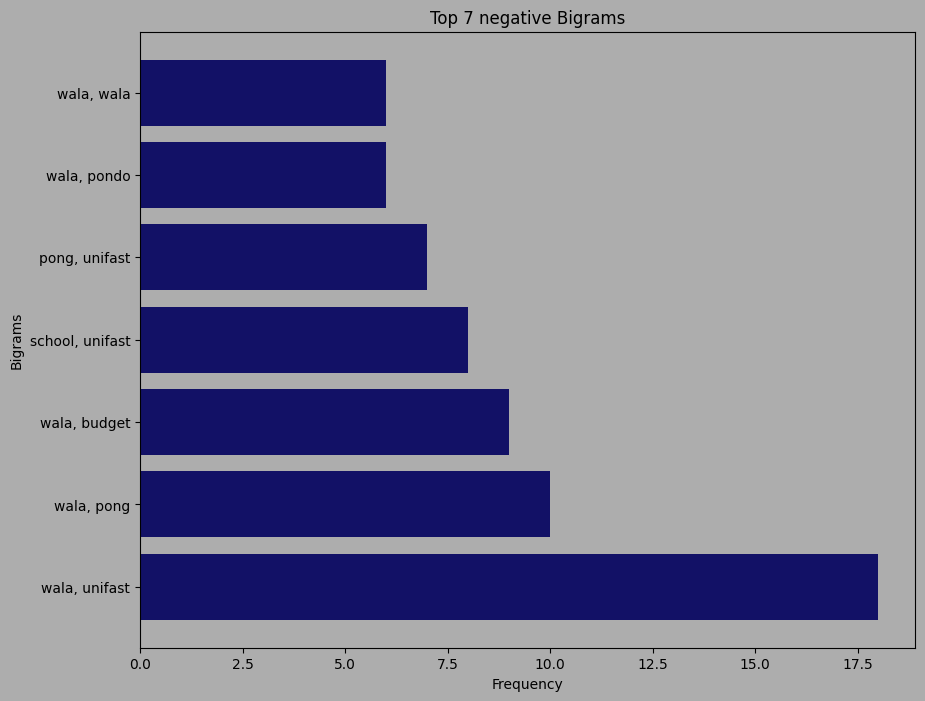

In [25]:
# top 7 negative bigrams 
negative.bigrams(7, 'negative', 'mksocialhub_negative_context_base_free_tution')

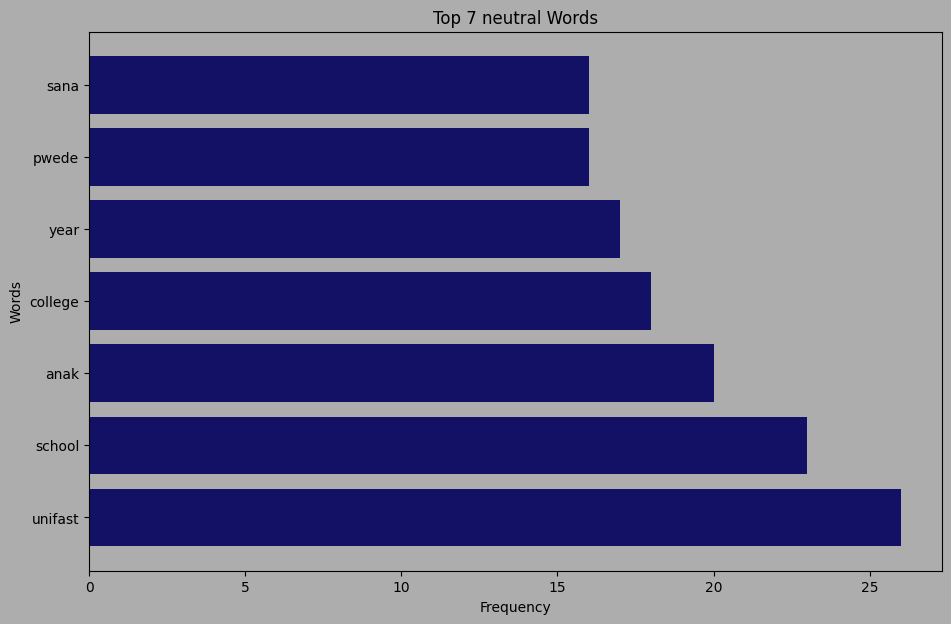

In [26]:
# top 7 neutral comments
x = df2[df2['CONTEXT-BASED'] == 1.0]
neutral = eda(x, text_column_name='features_string_format', sent_column_name='CONTEXT-BASED')
neutral.top_words(7, 'neutral', 'mksocialhub_neutral_context_base_free_tution')

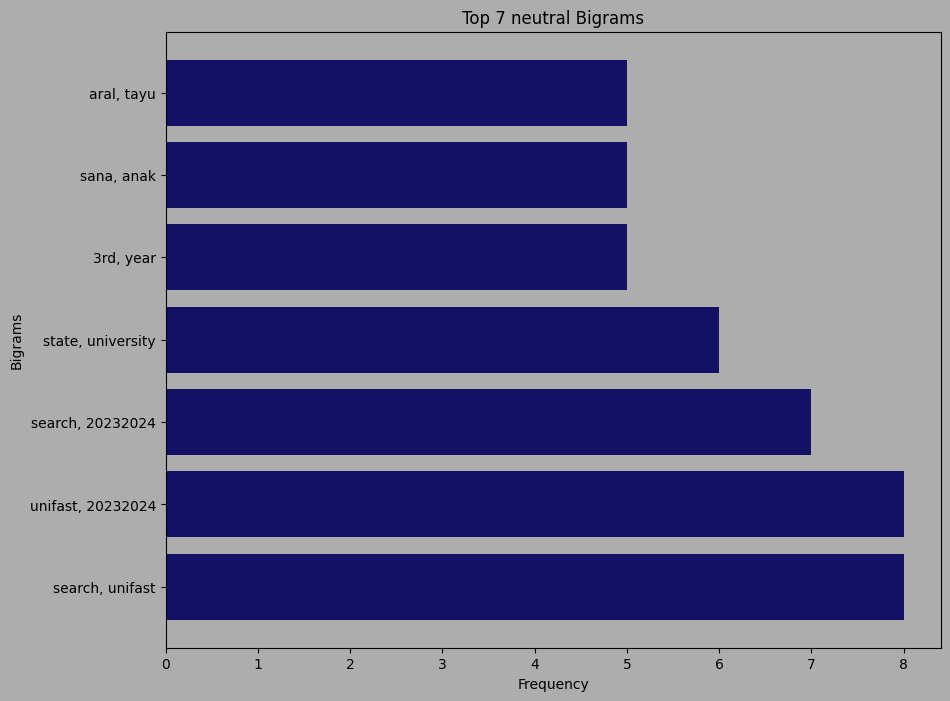

In [27]:
# top 7 nuetral comments _context_base_bam_related
neutral.bigrams(7, 'neutral', 'mksocialhub_neutral_context_base_free_tution')

## Phase 3: Free tuition sentiments of janelletee's video

### A. Facts and analysis

In [40]:
df3 = free_tuition.df[free_tuition.df['content_creator'] == 'janelletee']

In [41]:
df3['CONTEXT-BASED'].value_counts() 

1.0    143
0.0     21
2.0     14
Name: CONTEXT-BASED, dtype: int64

In [42]:
eda_janelletee = eda(df3, text_column_name='features_string_format', sent_column_name='CONTEXT-BASED', folder='janelletee')

In [43]:
eda_janelletee.df['features_string_format'].notnull().sum().sum()

178

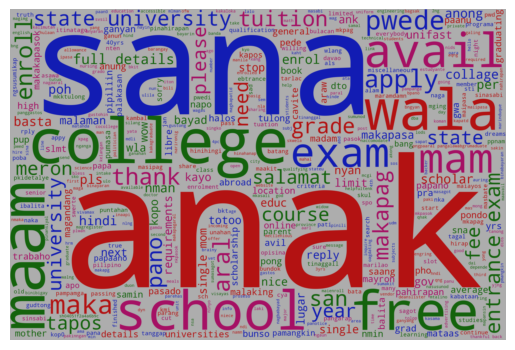

In [44]:
eda_janelletee.generate_wordcloud(filename='janelletee_all_comment_free_tuition')

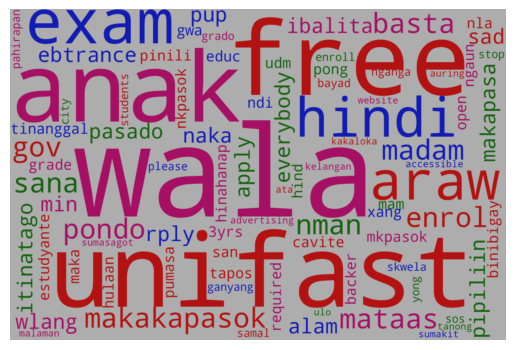

In [45]:
eda_janelletee.generate_wordcloud('janelletee_negative_free_tution', 'CONTEXT-BASED', 0.0)

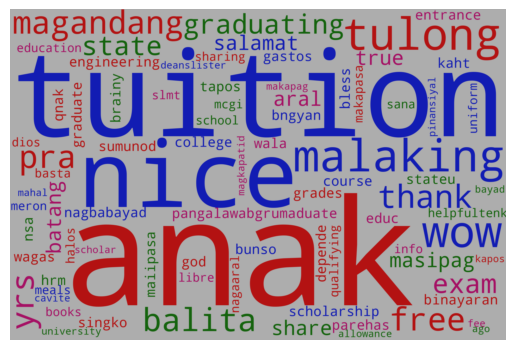

In [46]:
eda_janelletee.generate_wordcloud('janelletee_positive_free_tution', 'CONTEXT-BASED', 2.0)

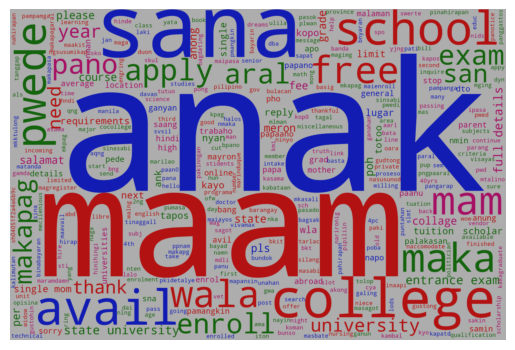

In [47]:
eda_janelletee.generate_wordcloud('janelletee_neutral_free_tution', 'CONTEXT-BASED', 1.0)

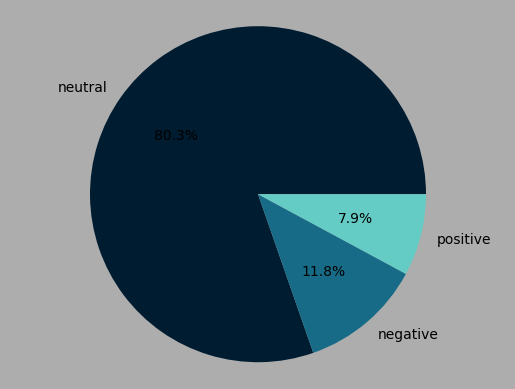

In [48]:
eda_janelletee.pie_sentiment('janelletee_free_tution', 'CONTEXT-BASED')

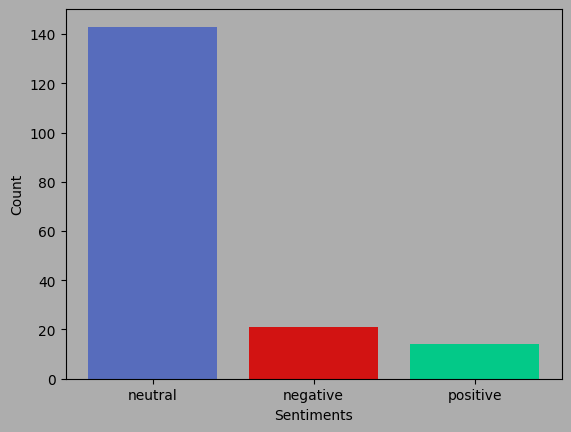

In [49]:
eda_janelletee.bar_sentiment('janelletee_free_tution', 'CONTEXT-BASED')

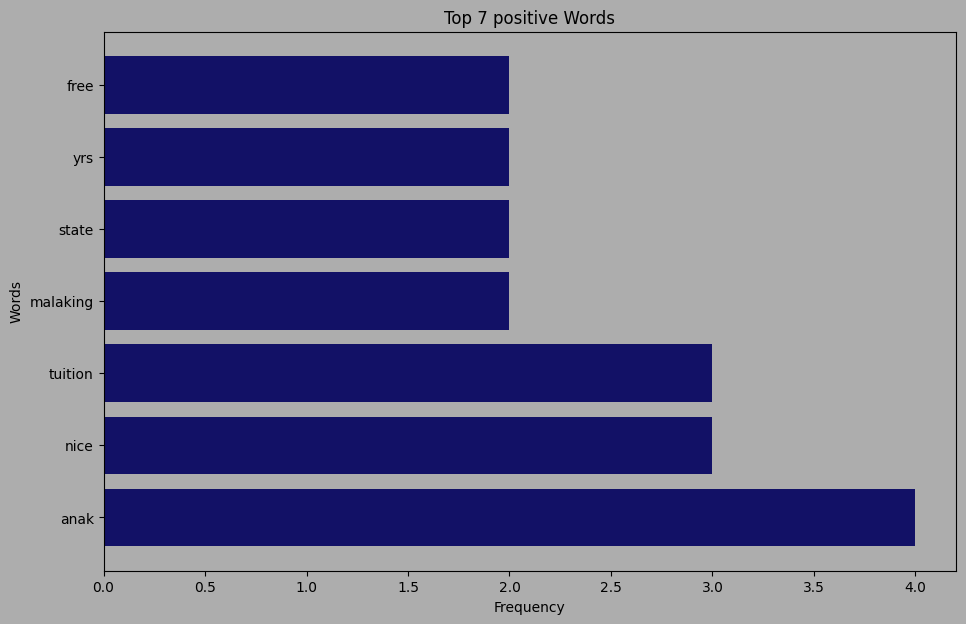

In [50]:
# top 7 positive comments
x = df3[df3['CONTEXT-BASED'] == 2]
positive = eda(x, text_column_name='features_string_format', sent_column_name='CONTEXT-BASED')
positive.top_words(7, 'positive', 'janelletee_positive_context_base_free_tution')

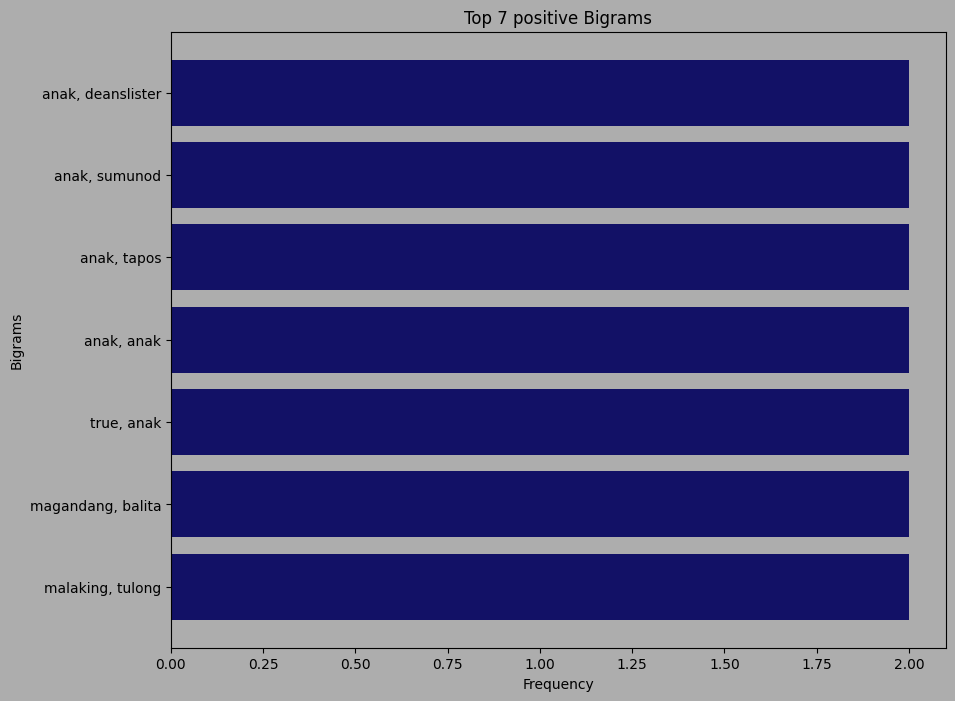

In [51]:
# top 7 positive bigrams
positive.bigrams(7, 'positive', 'janelletee_positive_context_base_free_tution')

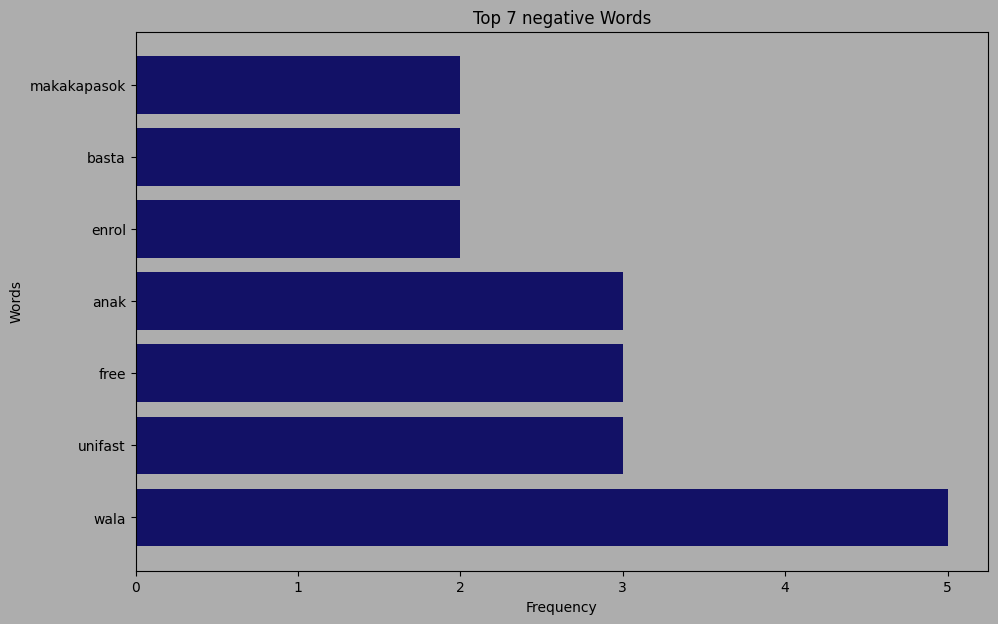

In [52]:
# top 7 negative comments
x = df3[df3['CONTEXT-BASED'] == 0.0]
negative = eda(x, text_column_name='features_string_format', sent_column_name='CONTEXT-BASED')
negative.top_words(7, 'negative', 'janelletee_negative_context_base_free_tution')

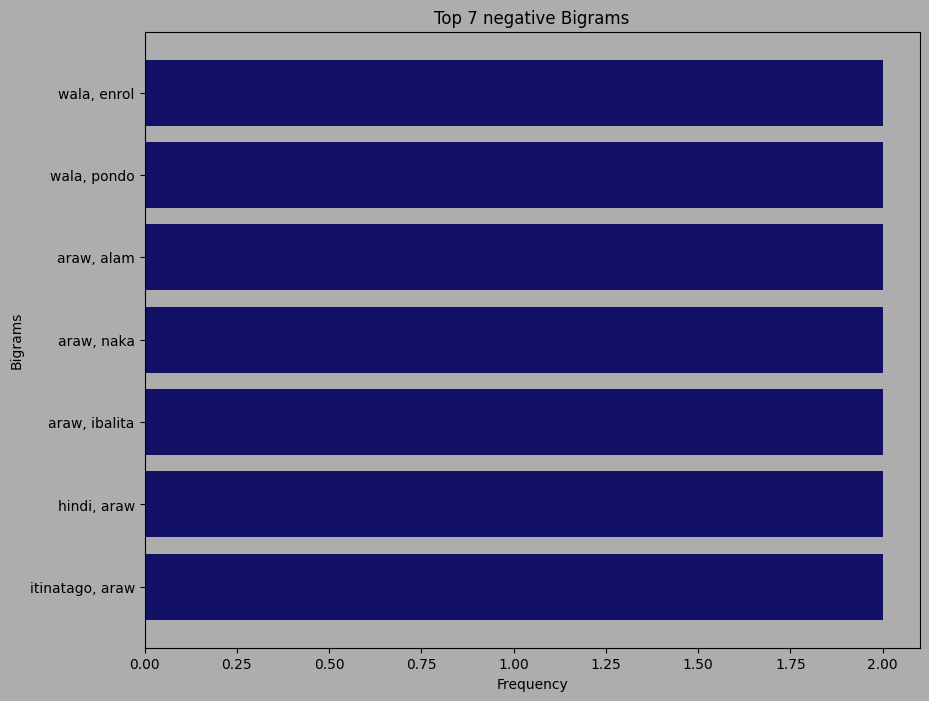

In [53]:
# top 7 negative bigrams 
negative.bigrams(7, 'negative', 'janelletee_negative_context_base_free_tution')

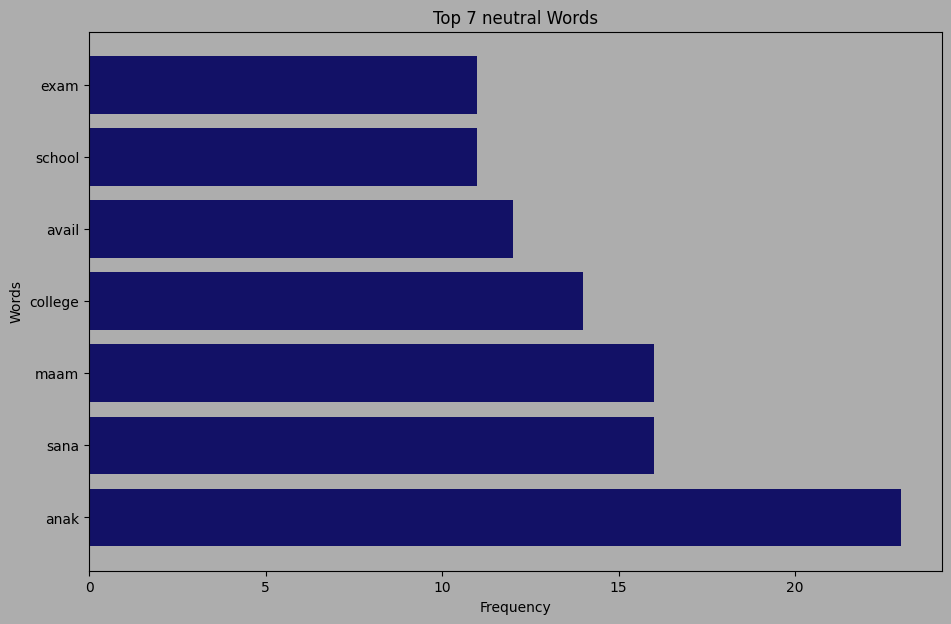

In [54]:
# top 7 neutral comments
x = df3[df3['CONTEXT-BASED'] == 1.0]
neutral = eda(x, text_column_name='features_string_format', sent_column_name='CONTEXT-BASED')
neutral.top_words(7, 'neutral', 'janelletee_neutral_context_base_free_tution')

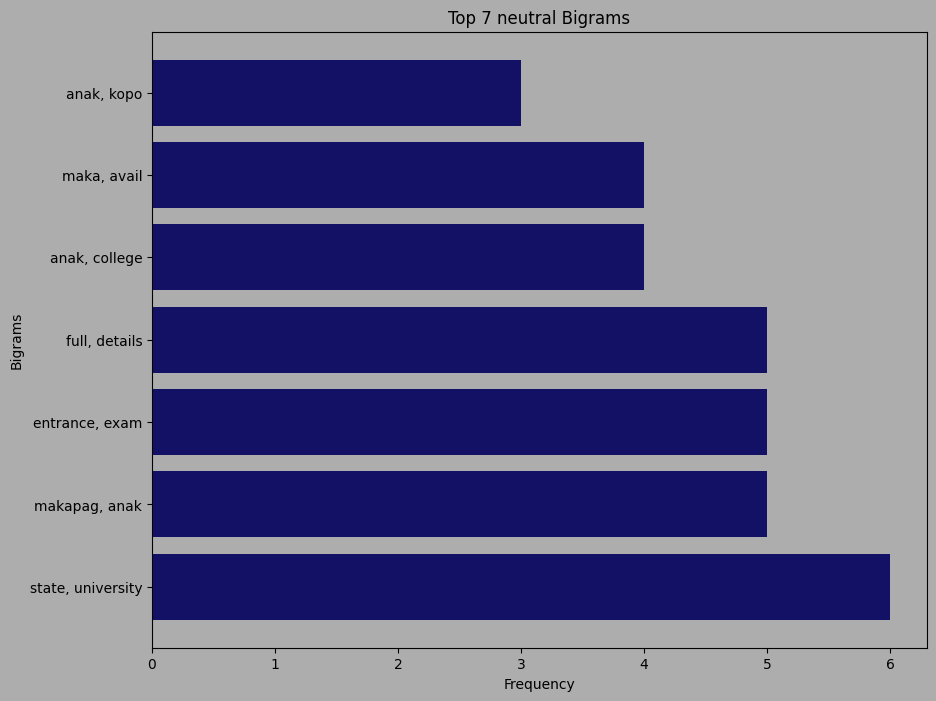

In [55]:
# top 7 nuetral comments _context_base_bam_related
neutral.bigrams(7, 'neutral', 'janelletee_neutral_context_base_free_tution')

## Phase 4: Free tuition sentiments of papabiii's video

### A. Facts and analysis

In [64]:
df4 = free_tuition.df[free_tuition.df['content_creator'] == 'papabi']

In [65]:
df4['CONTEXT-BASED'].value_counts() 

2.0    72
1.0    66
0.0    42
Name: CONTEXT-BASED, dtype: int64

In [66]:
eda_papabiii = eda(df4, text_column_name='features_string_format', sent_column_name='CONTEXT-BASED', folder='papabiii')

In [67]:
eda_papabiii.df['features_string_format'].notnull().sum().sum()

185

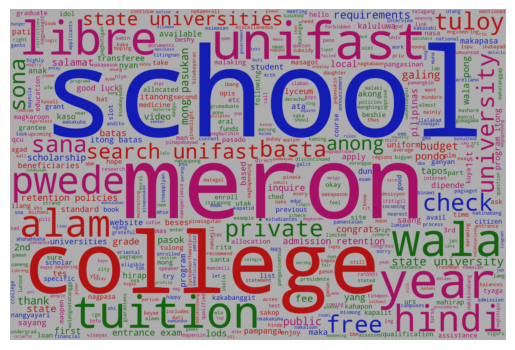

In [68]:
eda_papabiii.generate_wordcloud(filename='papabiii_all_comment_free_tuition')

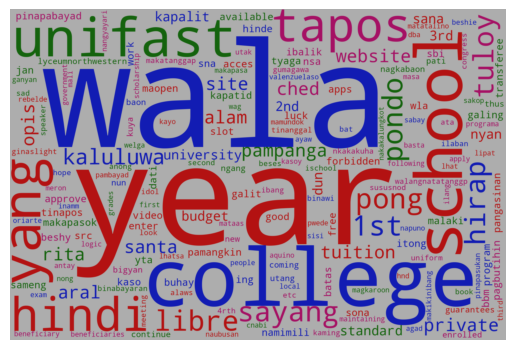

In [69]:
eda_papabiii.generate_wordcloud('papabiii_negative_free_tution', 'CONTEXT-BASED', 0.0)

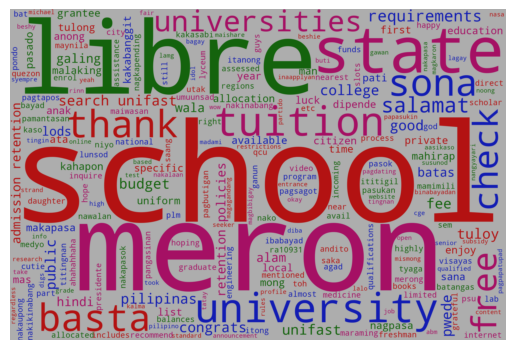

In [70]:
eda_papabiii.generate_wordcloud('papabiii_positive_free_tution', 'CONTEXT-BASED', 2.0)

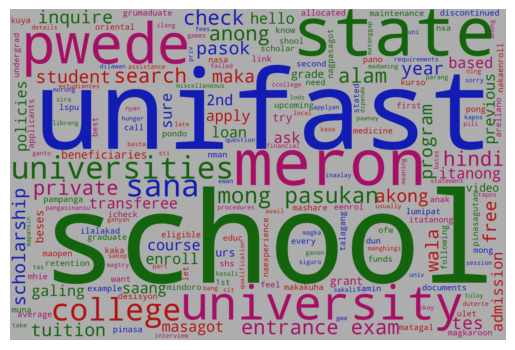

In [71]:
eda_papabiii.generate_wordcloud('papabiii_neutral_free_tution', 'CONTEXT-BASED', 1.0)

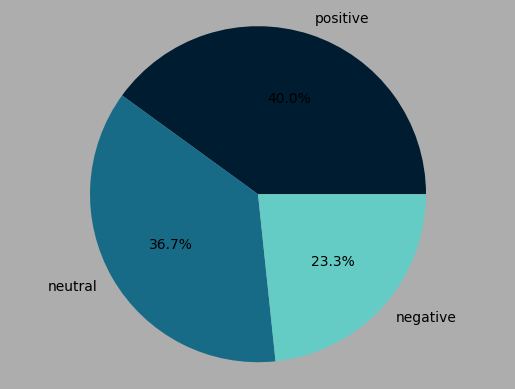

In [72]:
eda_papabiii.pie_sentiment('papabiii_free_tution', 'CONTEXT-BASED')

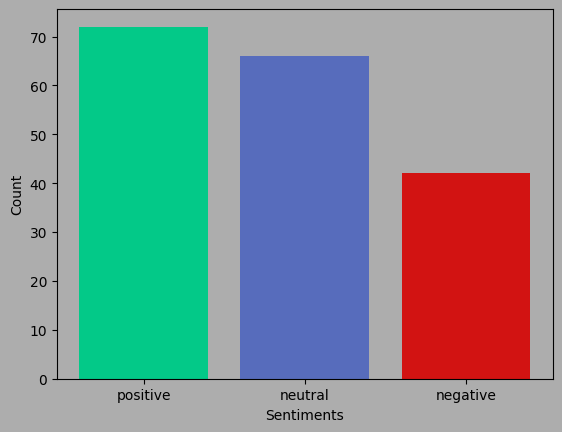

In [73]:
eda_papabiii.bar_sentiment('papabiii_free_tution', 'CONTEXT-BASED')

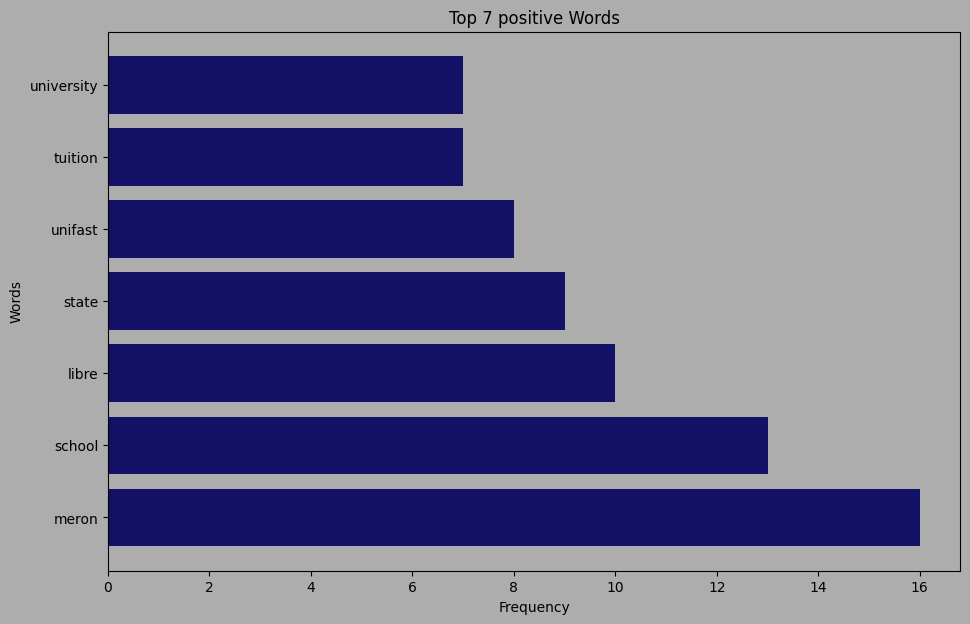

In [74]:
# top 7 positive comments
x = df4[df4['CONTEXT-BASED'] == 2]
positive = eda(x, text_column_name='features_string_format', sent_column_name='CONTEXT-BASED')
positive.top_words(7, 'positive', 'papabiii_positive_context_base_free_tution')

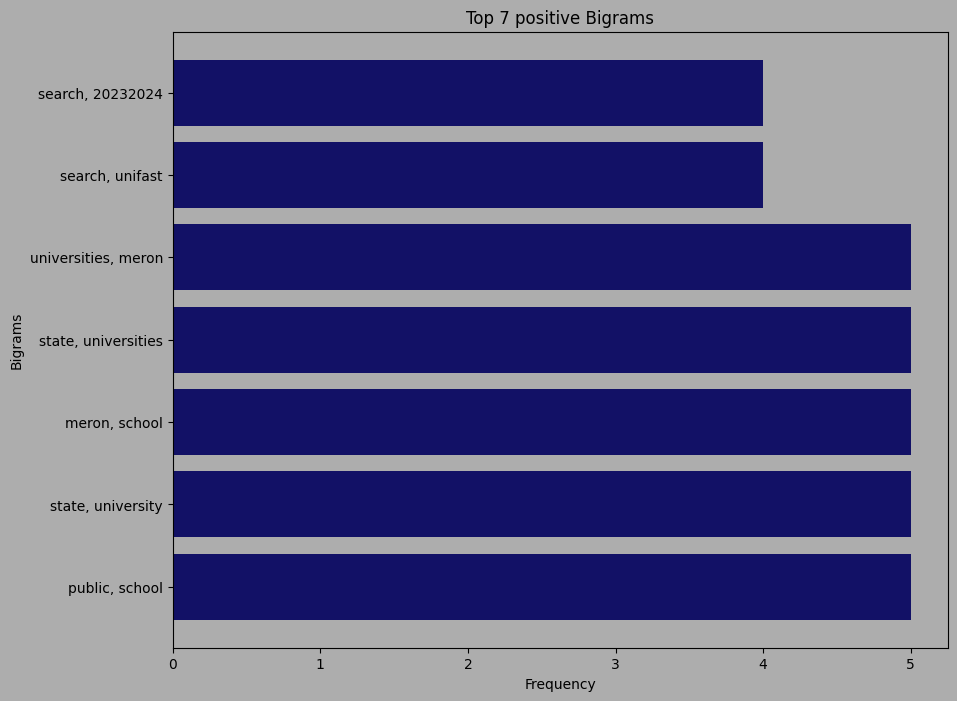

In [75]:
# top 7 positive bigrams
positive.bigrams(7, 'positive', 'papabiii_positive_context_base_free_tution')

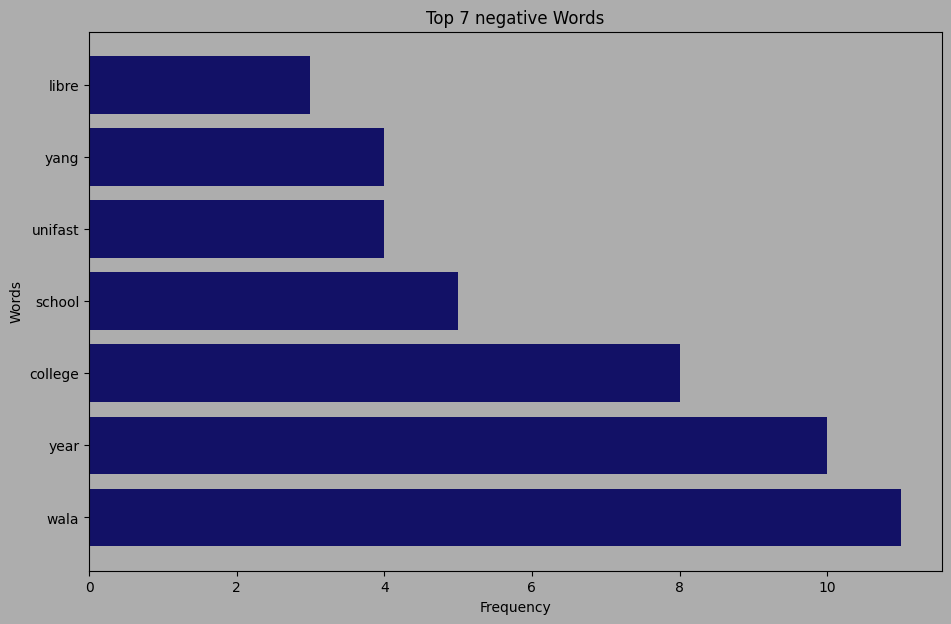

In [76]:
# top 7 negative comments
x = df4[df4['CONTEXT-BASED'] == 0.0]
negative = eda(x, text_column_name='features_string_format', sent_column_name='CONTEXT-BASED')
negative.top_words(7, 'negative', 'papabiii_negative_context_base_free_tution')

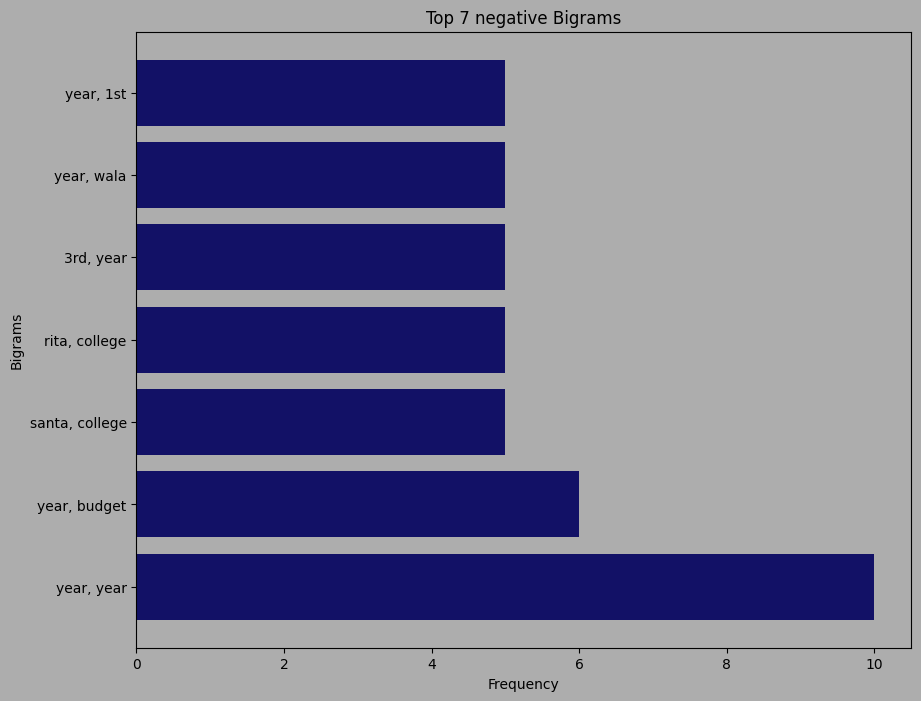

In [77]:
# top 7 negative bigrams 
negative.bigrams(7, 'negative', 'papabiii_negative_context_base_free_tution')

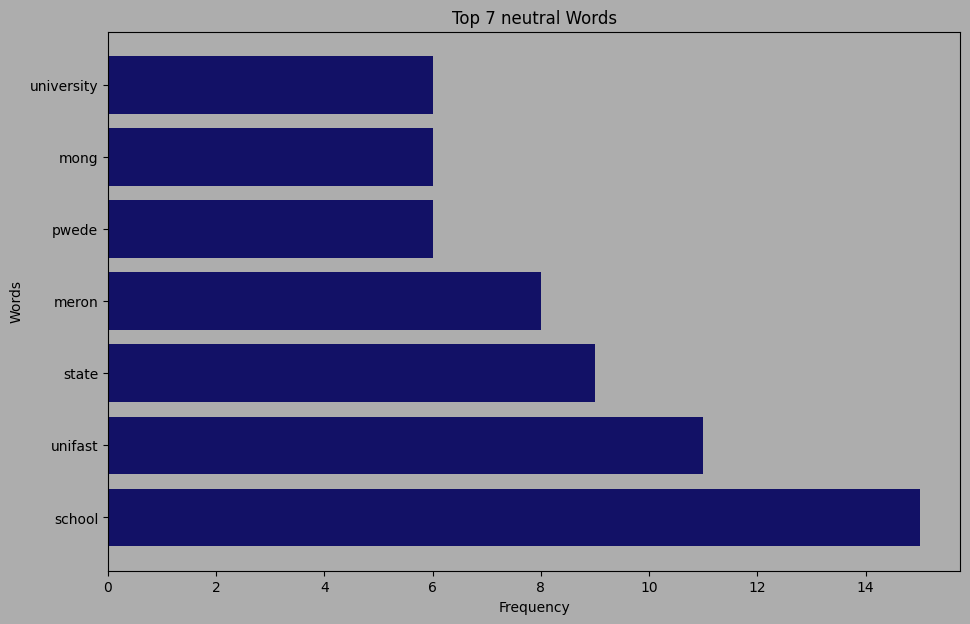

In [78]:
# top 7 neutral comments
x = df4[df4['CONTEXT-BASED'] == 1.0]
neutral = eda(x, text_column_name='features_string_format', sent_column_name='CONTEXT-BASED')
neutral.top_words(7, 'neutral', 'papabiii_neutral_context_base_free_tution')

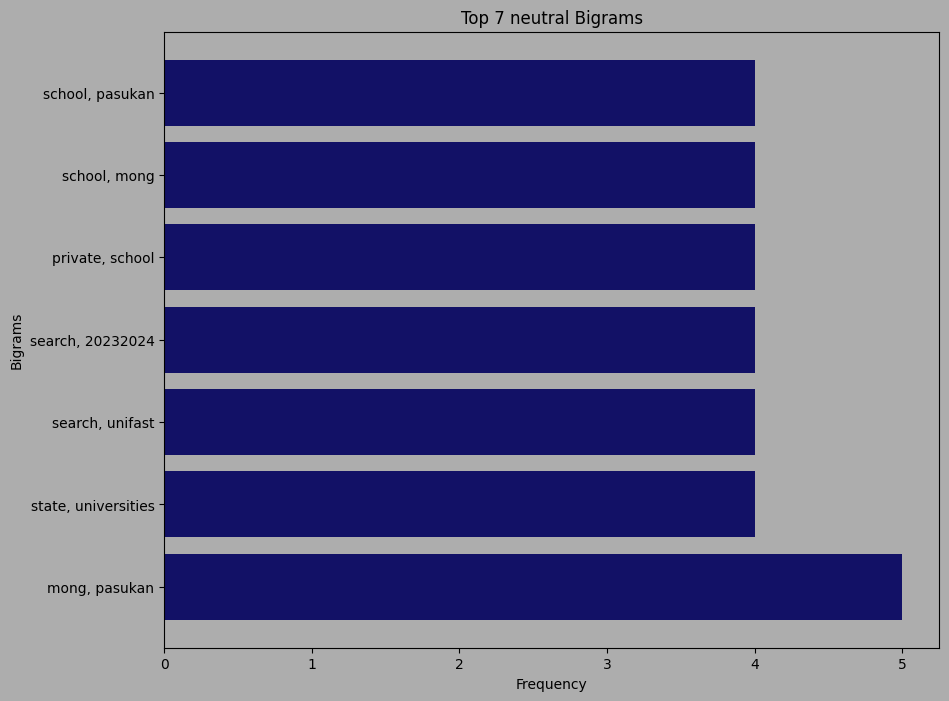

In [79]:
# top 7 nuetral comments _context_base_bam_related
neutral.bigrams(7, 'neutral', 'papabiii_neutral_context_base_free_tution')

# END OF PROGRAM